In [1]:
# VANILLA GRADIENT DESCENT

def vanilla_gradient_descent(x1, y, m, b, a, converged, epsilon = 0.001, num_samples = 40):
    m = [m]     # theta_0
    b = [b]     # theta_1
    cost = []
    del_m = []
    del_b = []
    y_pred = m[0]*x1 + b[0]
    error = np.mean((y - y_pred)**2)
    cost.append(error)

    epochs = 0
    for i in range(1000):
        del_m.append((2 / num_samples) * np.sum(x1 * (y_pred - y)))
        del_b.append((2 / num_samples) * np.sum(y_pred - y))

        m.append(m[i] - a*del_m[i])
        b.append(b[i] - a*del_b[i])
        y_pred = m[-1]*x1 + b[-1]
        error = np.mean((y - y_pred)**2)
        cost.append(error)
        epochs += 1

        if (np.abs(cost[i]-cost[i+1]) < epsilon):
            converged = True
            break
    return m, b, epochs, cost, del_m, del_b

# STOCHASTIC GRADIENT DESCENT

def stochastic_gradient_descent(x1, y, m, b, a, converged, epsilon = 0.001, num_samples = 40):
    m = [[m]]     # theta_0
    b = [[b]]     # theta_1
    cost = [[]]
    del_m = [[]]
    del_b = [[]]
    epochs = 0
    for i in range(1000):
      for j in range(num_samples):

        random_index = np.random.randint(num_samples)
        xi = x1[random_index]
        yi = y[random_index]
        yi_pred = m[i][j] * xi + b[i][j]
        error = np.abs(yi - yi_pred)
        cost[i].append(error)

        del_m[i].append(2 * xi * (yi_pred - yi))
        del_b[i].append(2 * (yi_pred - yi))
        m[i].append(m[i][j] - a*del_m[i][j])
        b[i].append(b[i][j] - a*del_b[i][j])

      if i != 0:
        if (np.abs(np.mean(cost[i])-np.mean(cost[i-1])) < epsilon):
            converged = True
            break

      m.append([m[i][j]])
      b.append([b[i][j]])
      cost.append([])
      del_m.append([])
      del_b.append([])
      epochs += 1

    cost = np.mean(cost, axis = 1)
    del_m = np.mean(del_m, axis = 1)
    del_b = np.mean(del_b, axis = 1)

    return m, b, epochs, cost, del_m, del_b

final slope =  99.97723074433478
final intercept =  0.4405728739638211
Average no of epochs =  920
cost =  [12503.121414228566, 6986.42267846548, 3905.7296776675676, 2185.3696945096676, 1224.6573420993852, 688.1532917927478, 388.53894766601996, 221.21042634041387, 127.75402690383471, 75.54992344778259, 46.38230304202536, 30.078951861162324, 20.959424218476947, 15.851601949794224, 12.984086333234472, 11.36767911292789, 10.449984401203647, 9.922528830853036, 9.61305211521512, 9.425359118856036, 9.30573159080914, 9.224171547726545, 9.163927060426744, 9.115643163495168, 9.074095561484706, 9.036366640140724, 9.000826900634726, 8.966566164276562, 8.93307594149518, 8.900072057890444, 8.867395603714396, 8.834957621318274, 8.802708217091507, 8.770619312711343, 8.738675012958034, 8.706866226837299, 8.675187663858177, 8.643636156672141, 8.61220972438273, 8.580907049471602, 8.549727185692078, 8.518669394948507, 8.487733056202114, 8.456917614595895, 8.426222553043996, 8.395647376362627, 8.365191602

Text(0, 0.5, 'b')

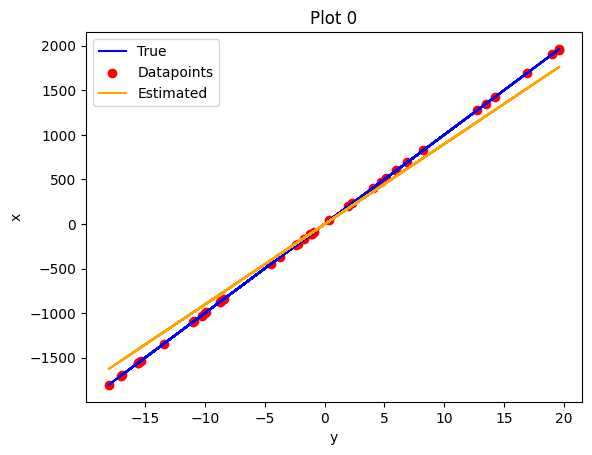

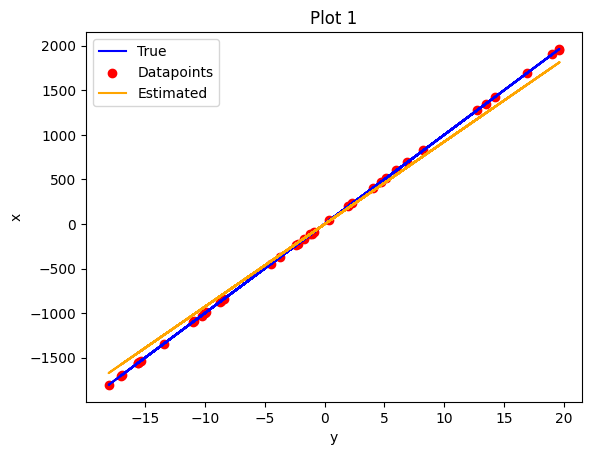

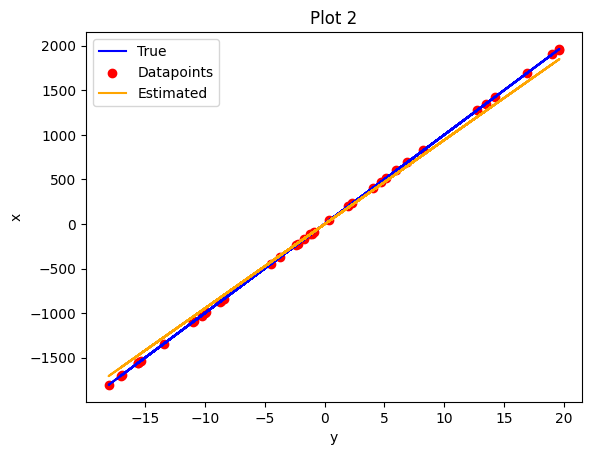

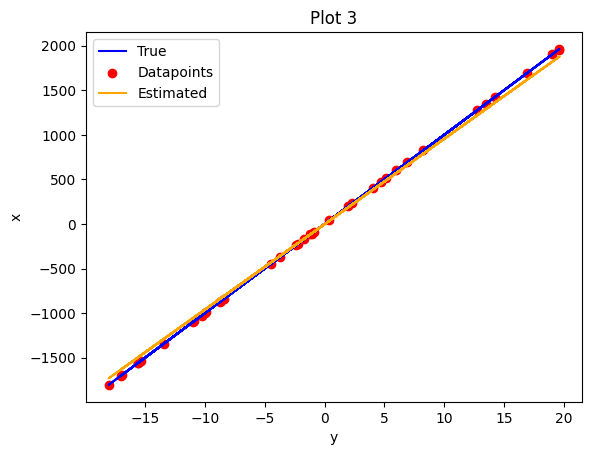

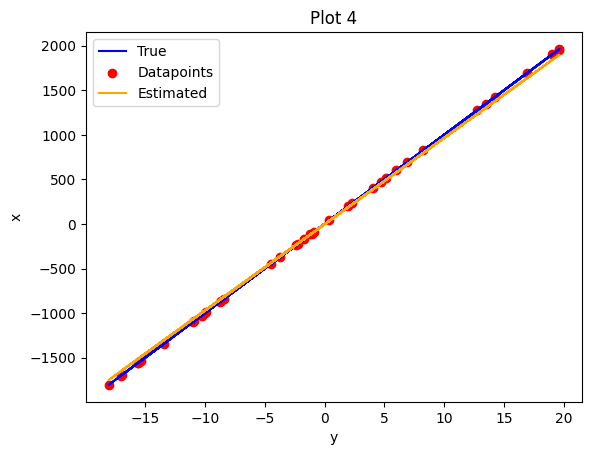

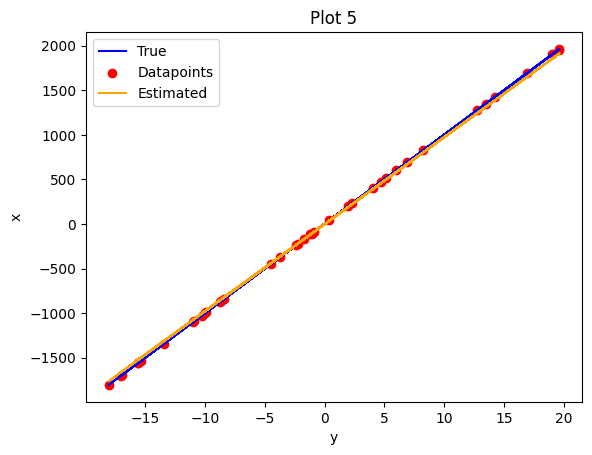

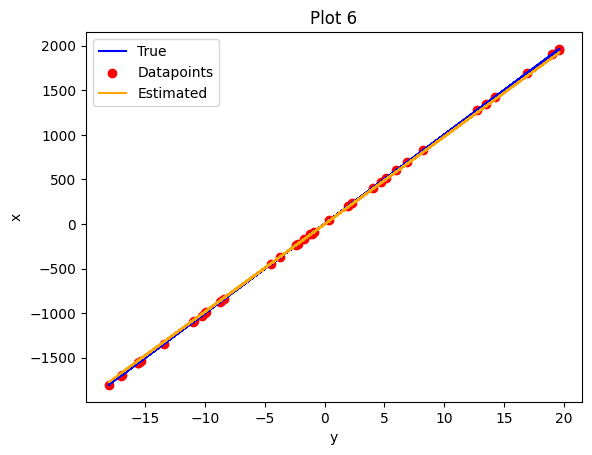

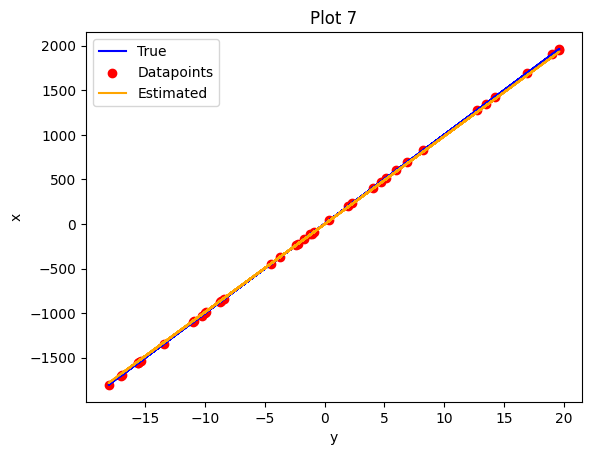

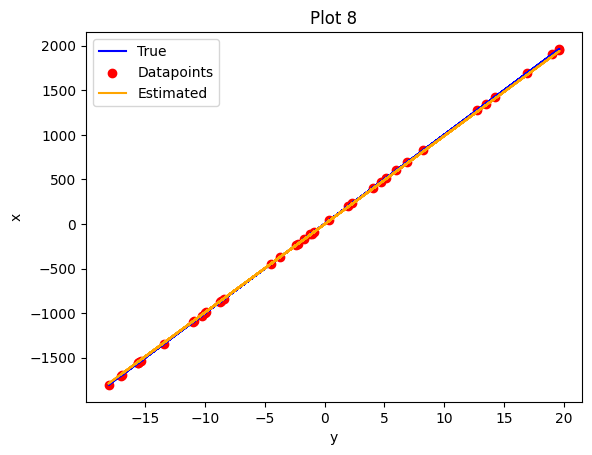

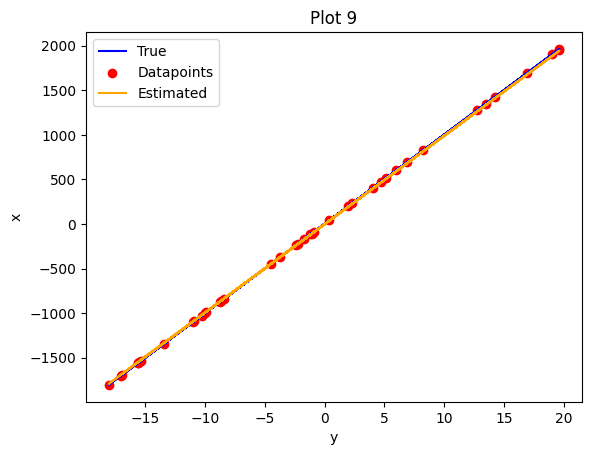

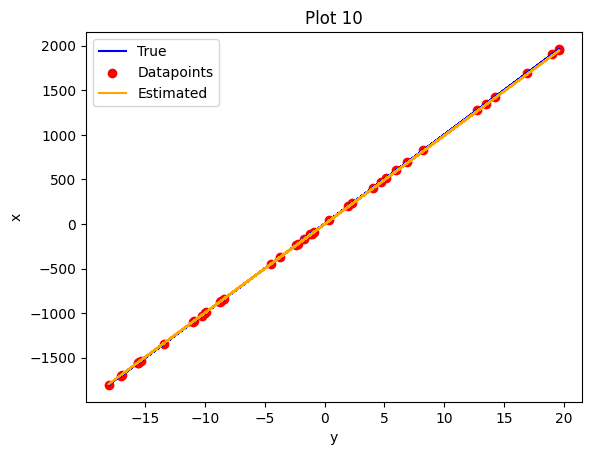

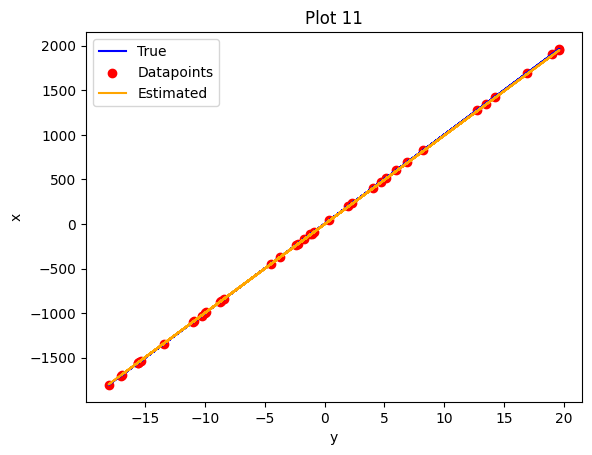

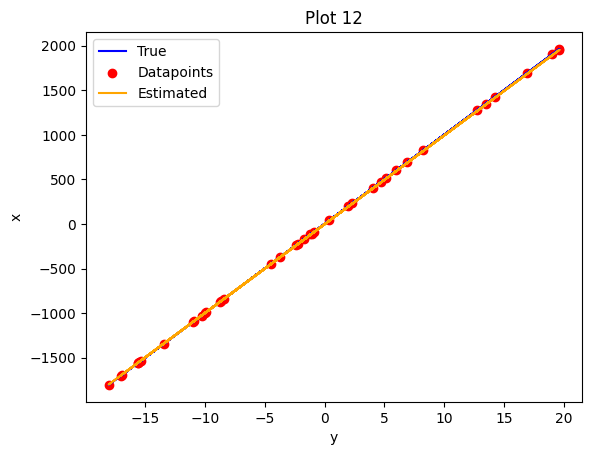

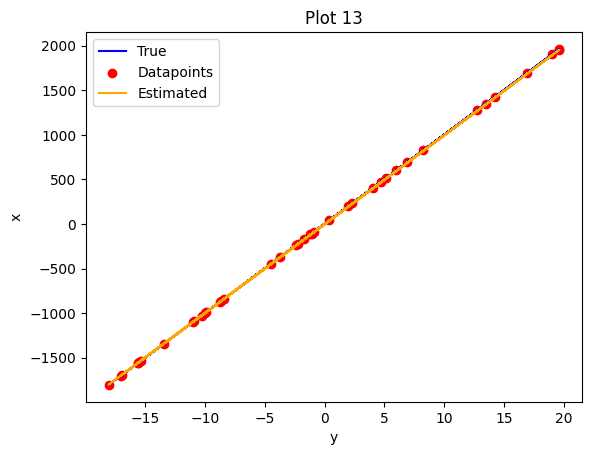

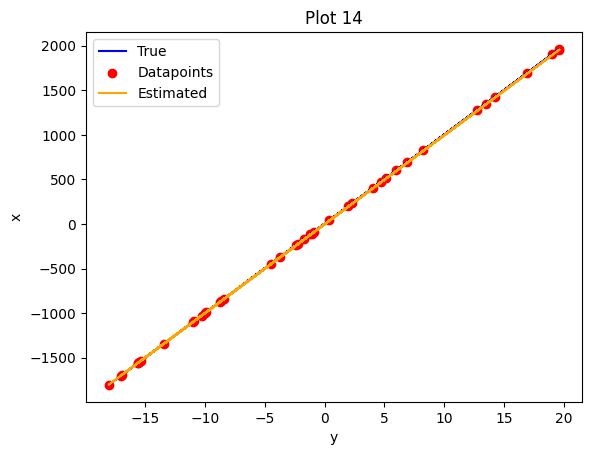

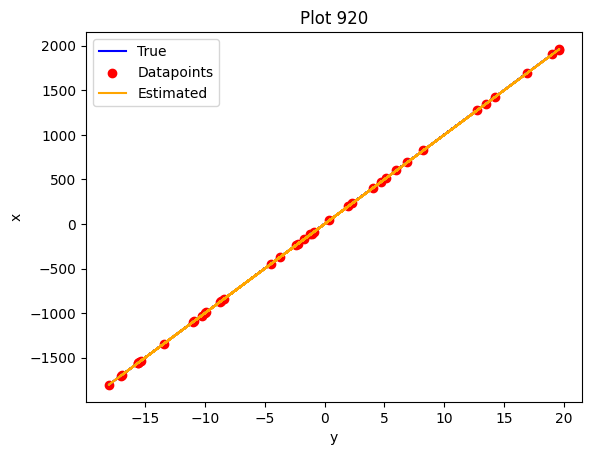

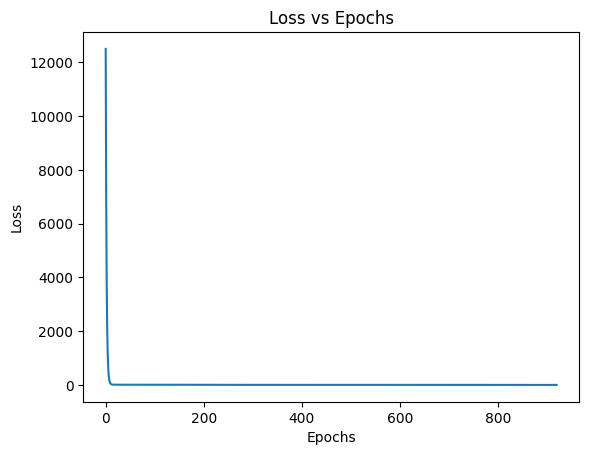

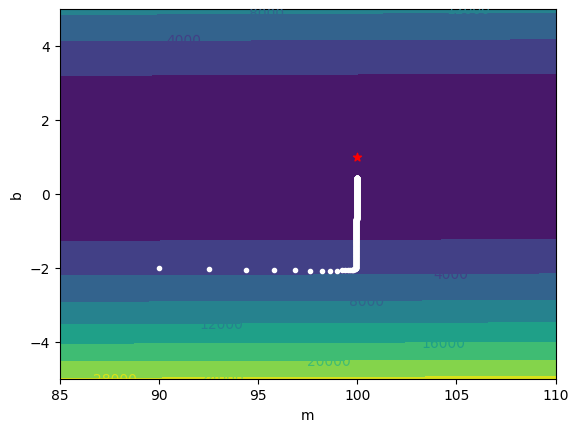

In [2]:
# FULL BATCH GD ON DATASET 1

import numpy as np
import matplotlib.pyplot as plt

num_samples = 40
np.random.seed(45)

x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1

eps = np.random.randn(num_samples)
y = f_x + eps

m = 90
b = -2
a = 0.001  # learning rate
converged = False
epsilon = 0.001

m, b, epochs, cost, del_m, del_b = vanilla_gradient_descent(x1, y, m, b, a, converged, epsilon)

print("final slope = ", m[-1])
print("final intercept = ", b[-1])
print("Average no of epochs = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i]*x1 + b[i] # estimated function for underlying function

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1]*x1 + b[-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# contour plot
m1 = np.linspace(85,110,200)
b1 = np.linspace(-5,5,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(100,1, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")

final slope =  100.02909547053143
final intercept =  0.9425442945188195
Average no of epochs =  142.53
No of epochs taken by last iteration =  89
cost =  [9.03996667 2.55530391 2.36318832 1.78462851 2.0175844  1.73393039
 1.6353778  1.72790111 1.17262779 1.278698   1.06981291 1.23092762
 0.99309784 0.95762228 1.25936662 0.98358975 0.99753728 0.69623357
 0.70952514 0.64894737 0.98164818 1.02032095 0.95605753 0.77119795
 0.70948055 0.76999476 0.6816336  0.80374441 0.74550209 0.77889995
 0.58752191 0.60572083 0.8182334  0.73242982 0.78278622 0.73321779
 0.79939588 0.70079064 0.84668706 0.70855305 0.74031833 0.76459281
 0.6734794  0.67952875 0.7718864  0.62339456 0.77890599 0.84554192
 0.74236439 0.63625766 0.63965033 0.68994987 0.71031149 0.59130972
 0.70869233 0.66672378 0.70936843 0.61288891 0.68905263 0.54160225
 0.66933585 0.53681546 0.57051308 0.81816078 0.68203245 0.56949941
 0.81355694 0.6962683  0.59862617 0.72833923 0.6793425  0.69595417
 0.7271602  0.64642807 0.70083138 0.832664

Text(0, 0.5, 'b')

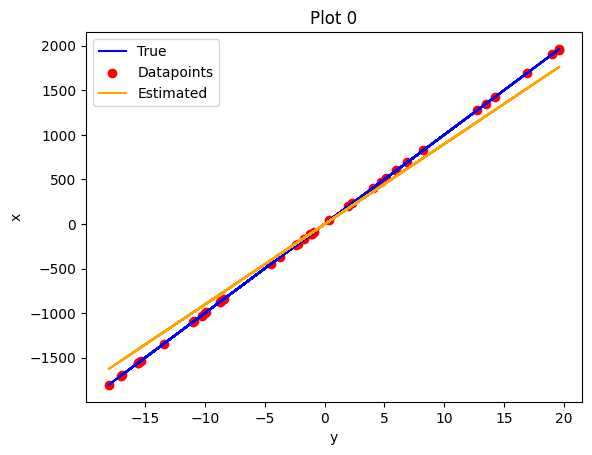

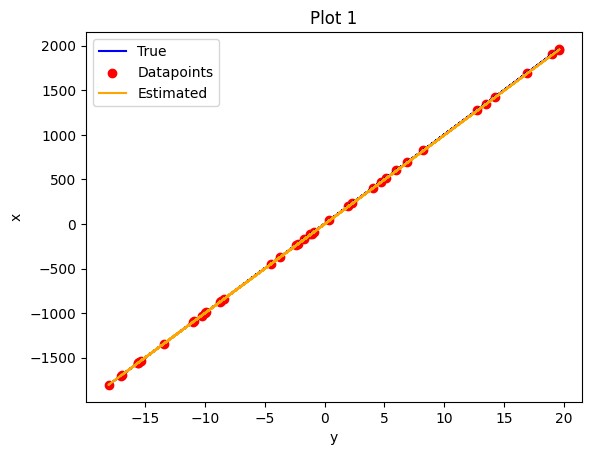

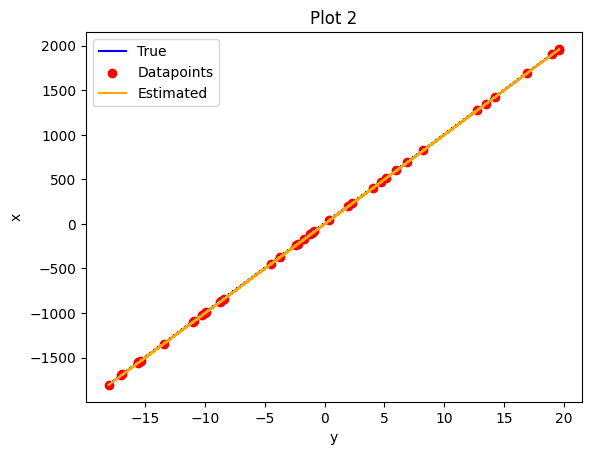

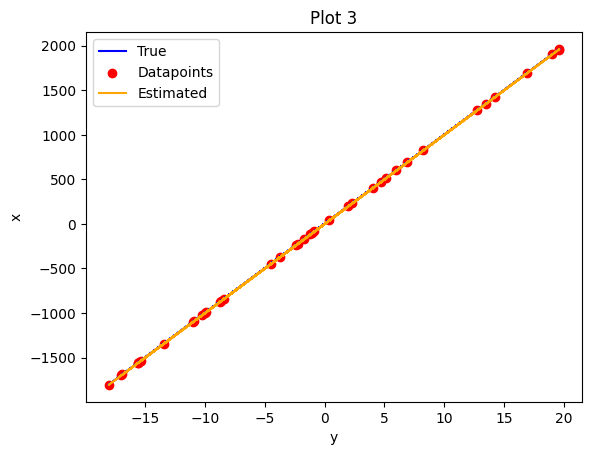

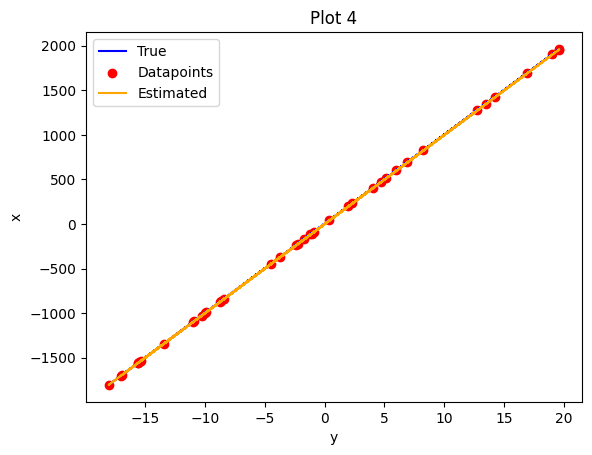

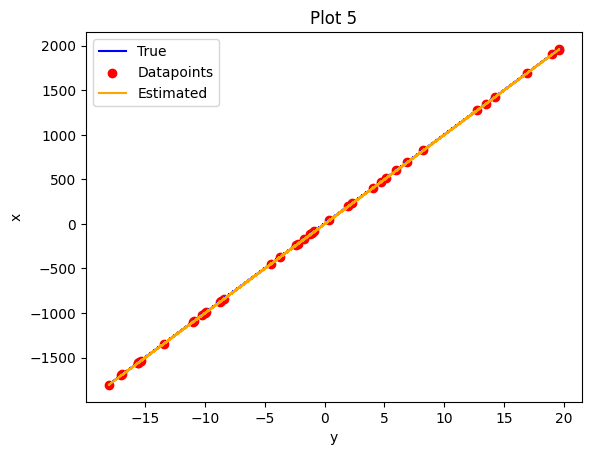

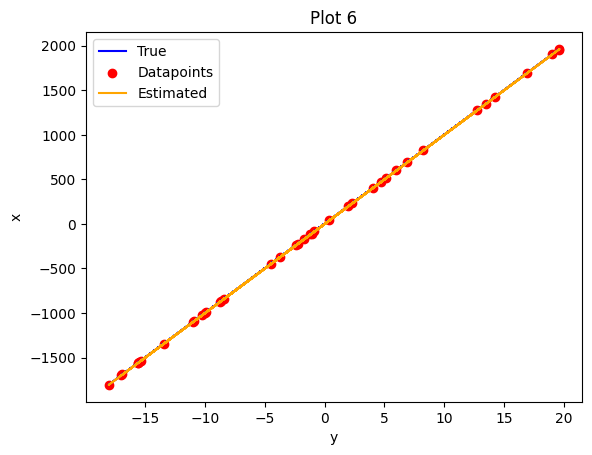

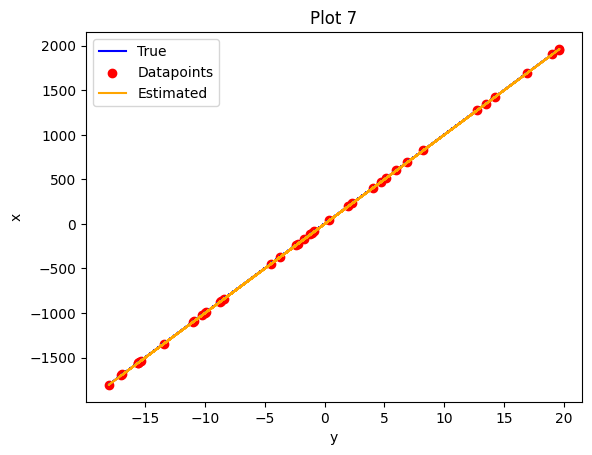

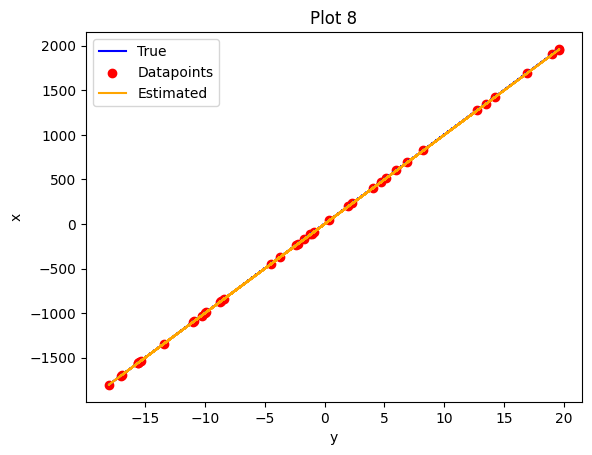

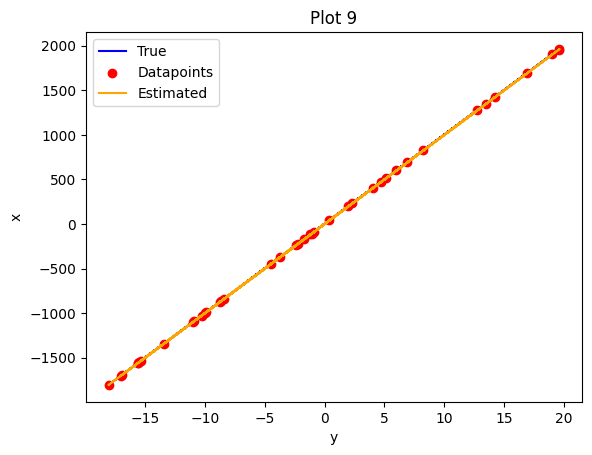

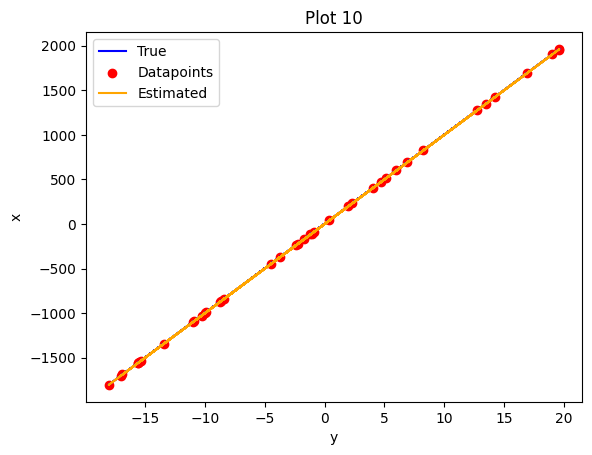

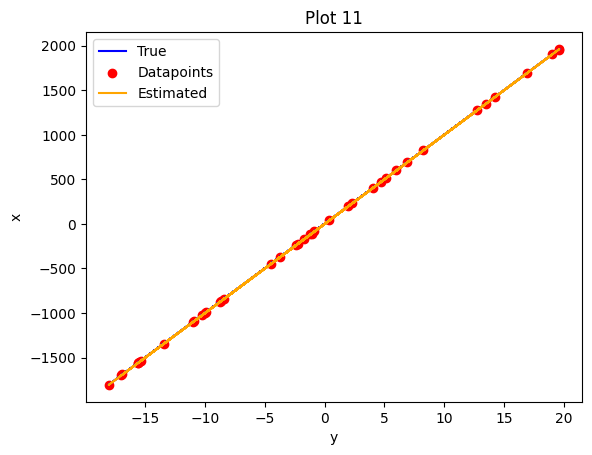

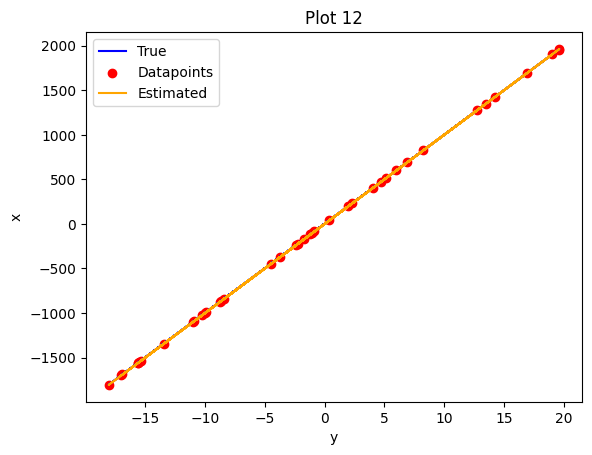

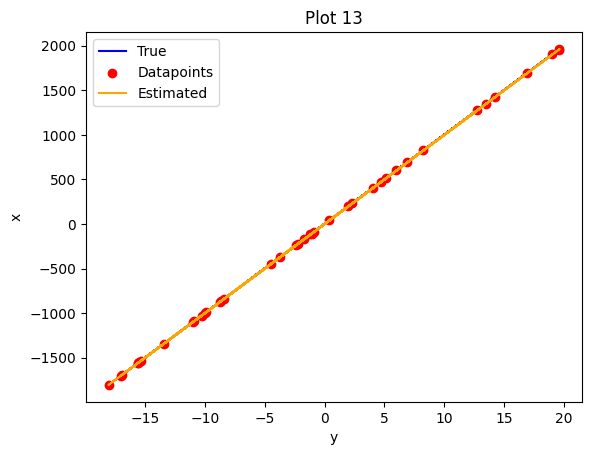

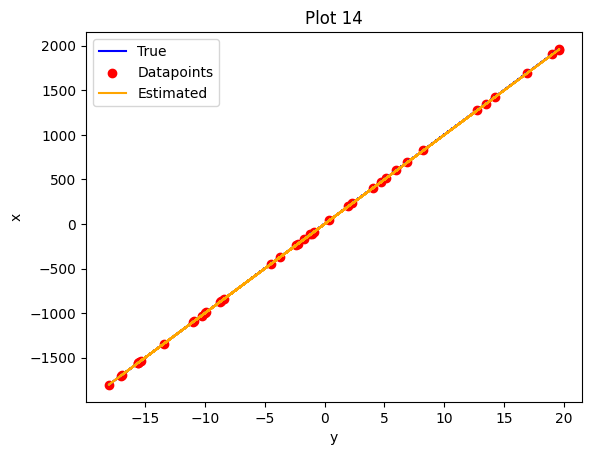

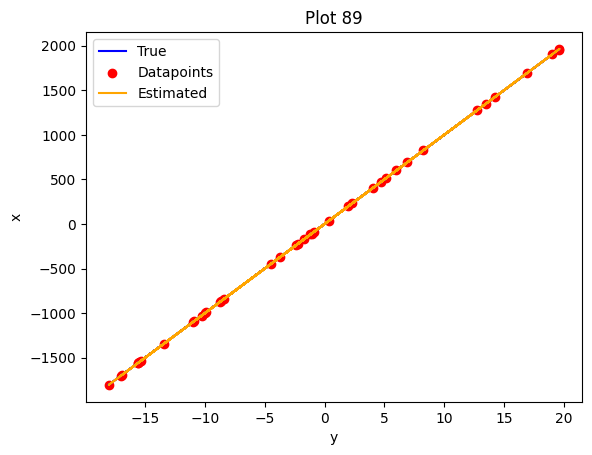

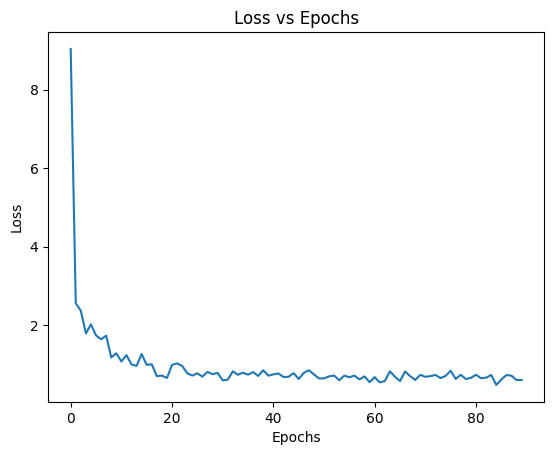

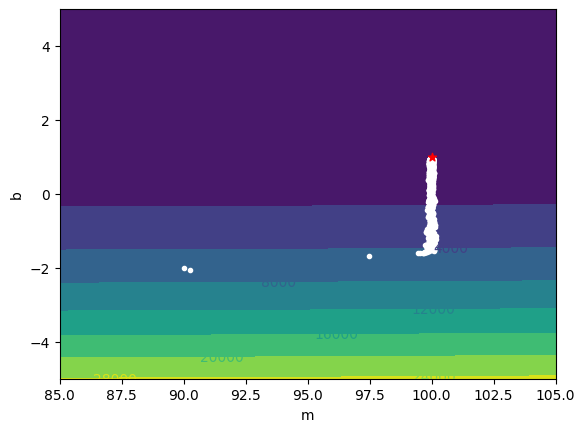

In [3]:
# SGD on dataset 1

import numpy as np
import matplotlib.pyplot as plt

num_samples = 40
np.random.seed(45)

x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1

eps = np.random.randn(num_samples)
y = f_x + eps

m = 90
b = -2
a = 0.001    # learning rate
converged = False
epsilon = 0.001

epochs_avg = []
for k in range(100):
    M, B, epochs, cost, del_m, del_b = stochastic_gradient_descent(x1, y, m, b, a, converged, epsilon)
    epochs_avg.append(epochs)
m = M
b = B

print("final slope = ", m[-1][-1])
print("final intercept = ", b[-1][-1])
print("Average no of epochs = ", sum(epochs_avg)/len(epochs_avg))
print("No of epochs taken by last iteration = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i][0]*x1 + b[i][0] # estimated function for underlying function, choosing m and b at the end of each epoch

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1][-1]*x1 + b[-1][-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# contour plot
m1 = np.linspace(85,105,200)
b1 = np.linspace(-5,5,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(100,1, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")

final slope =  1.967994707573941
final intercept =  3.8358908424924745
epochs =  480
cost =  [16.68148600324362, 16.400299157770764, 16.124507915338384, 15.854005371230334, 15.588686760409027, 15.328449414556772, 15.073192719980458, 14.822818076362145, 14.57722885633864, 14.336330365893314, 14.100029805543901, 13.868236232310242, 13.640860522446308, 13.417815334921125, 13.199015075633557, 12.984375862346212, 12.77381549032397, 12.56725339866302, 12.364610637296497, 12.165809834663111, 11.970775166025476, 11.779432322425034, 11.59170848026082, 11.4075322714795, 11.226833754364396, 11.049544384911483, 10.87559698878052, 10.704925733809796, 10.53746610308312, 10.373154868537988, 10.211930065104045, 10.053730965361144, 9.898498054706616, 9.74617300702148, 9.596698660825552, 9.45001899591168, 9.30607911044939, 9.164825198548613, 9.026204528274135, 8.890165420101805, 8.75665722580755, 8.625630307780545, 8.497036018751993, 8.370826681931147, 8.246955571540436, 8.125376893741599, 8.00604576794

Text(0, 0.5, 'b')

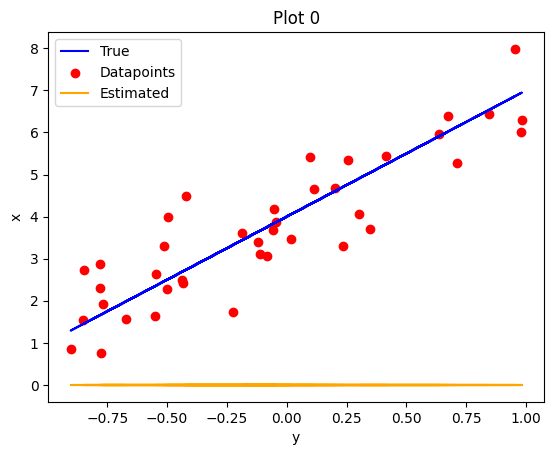

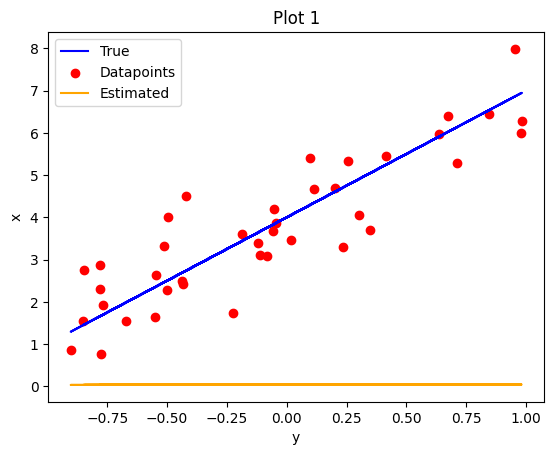

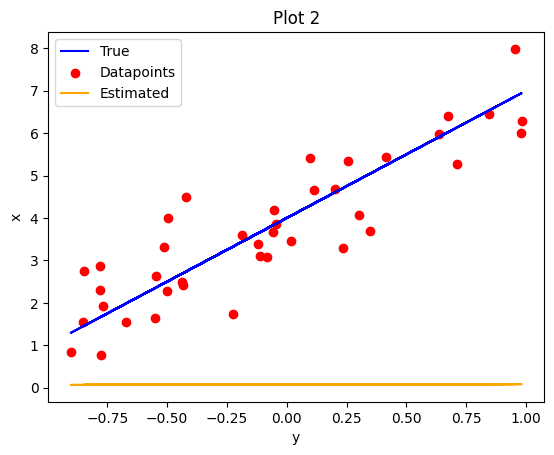

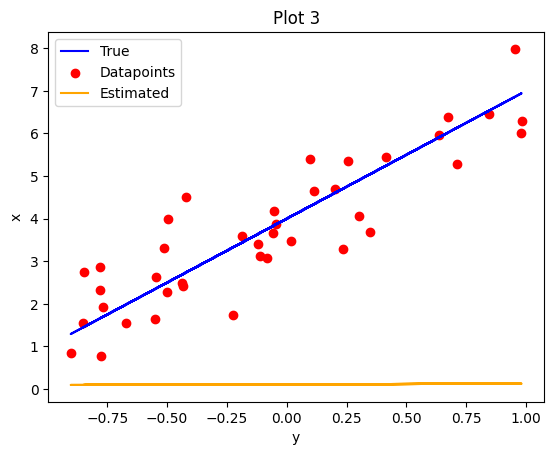

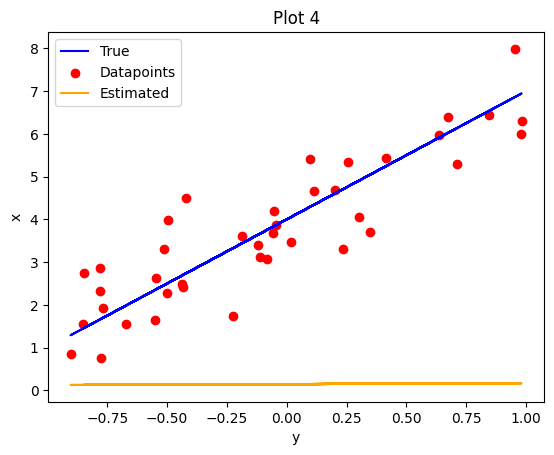

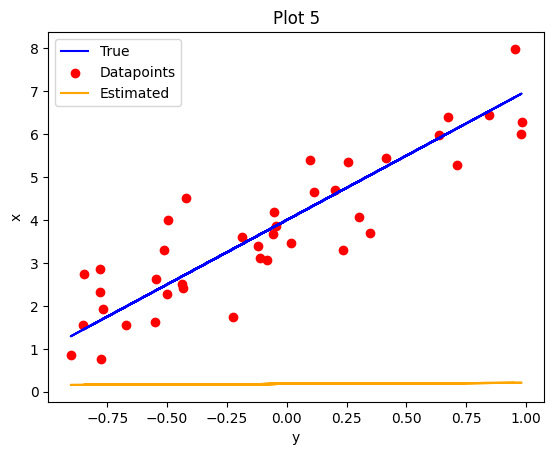

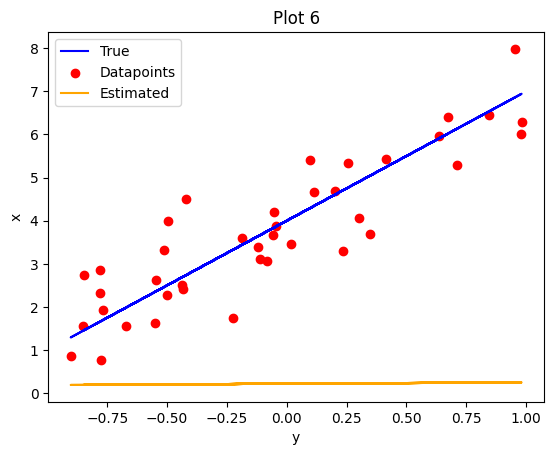

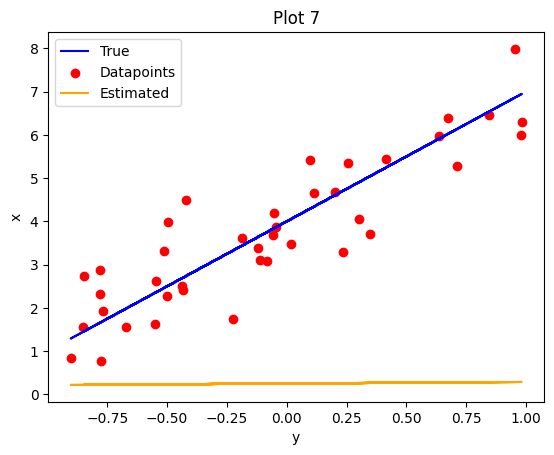

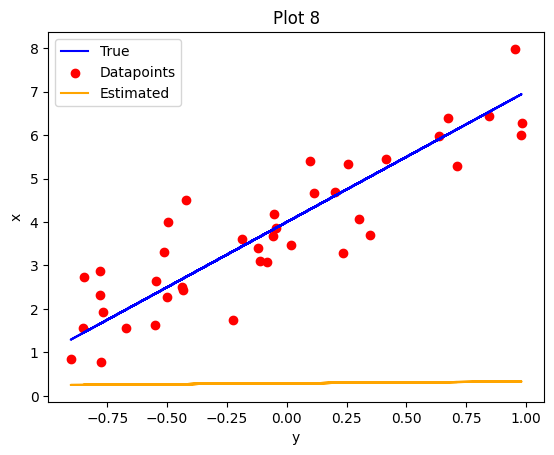

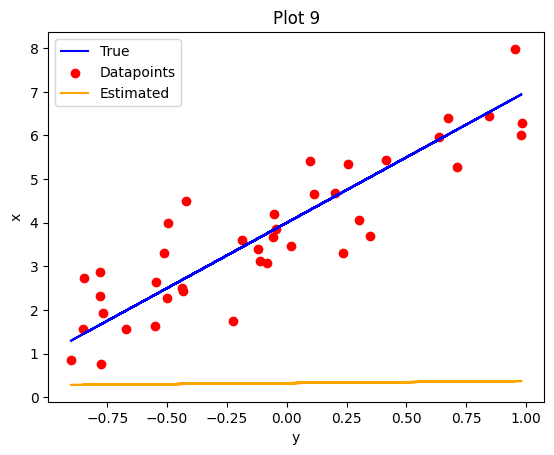

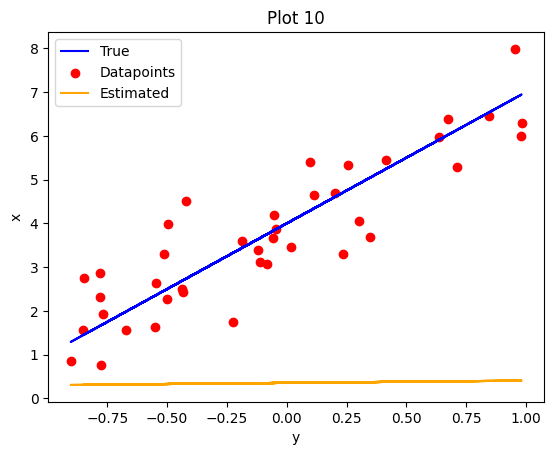

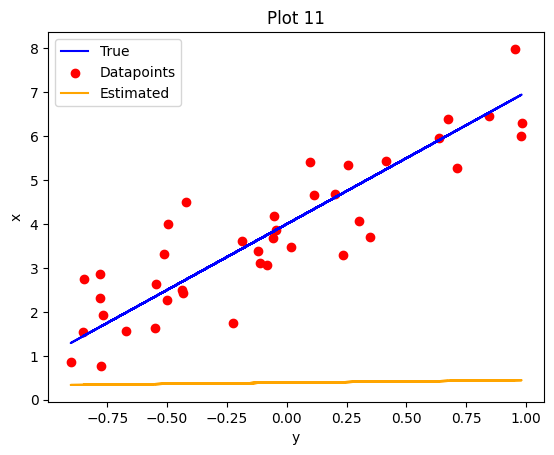

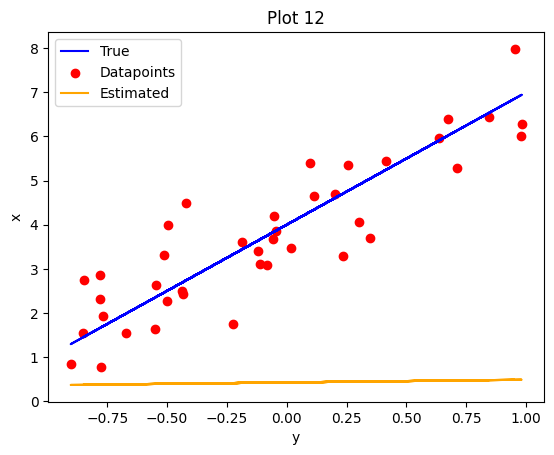

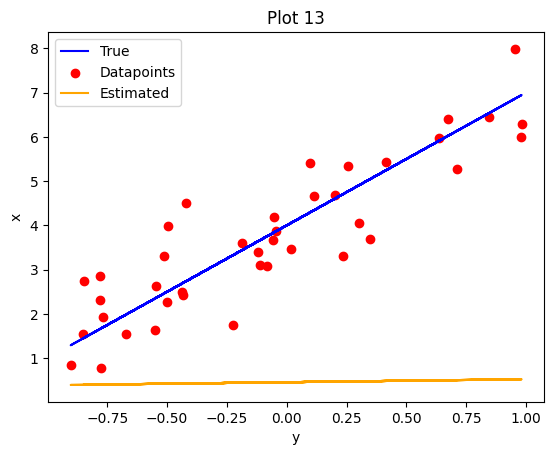

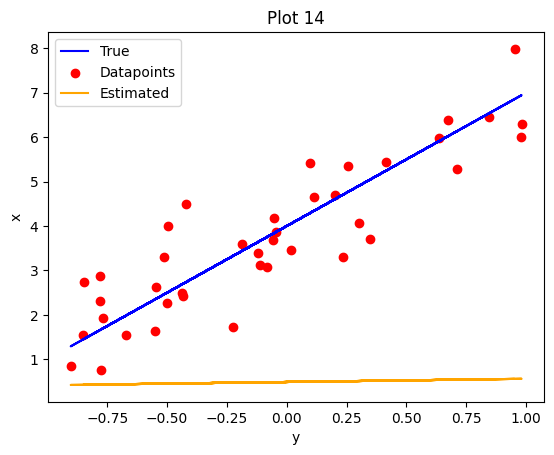

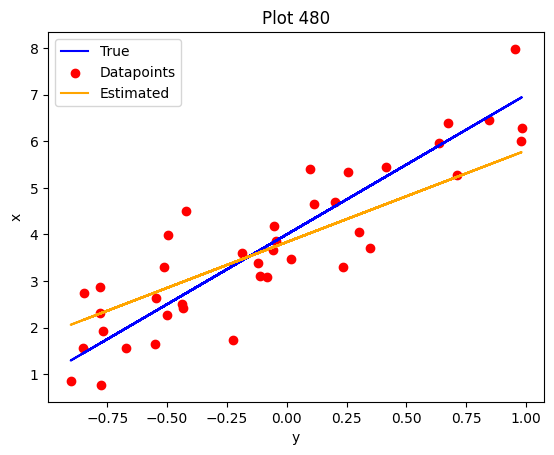

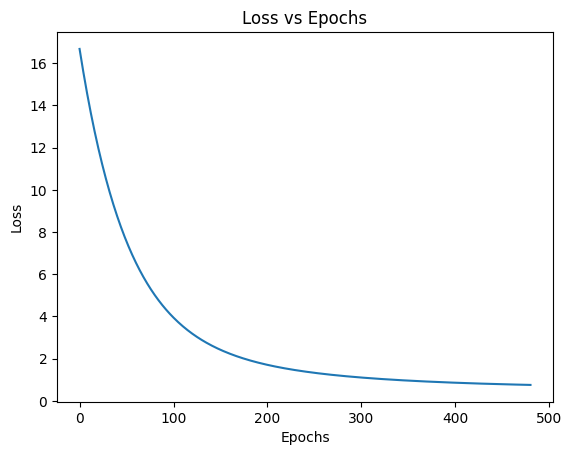

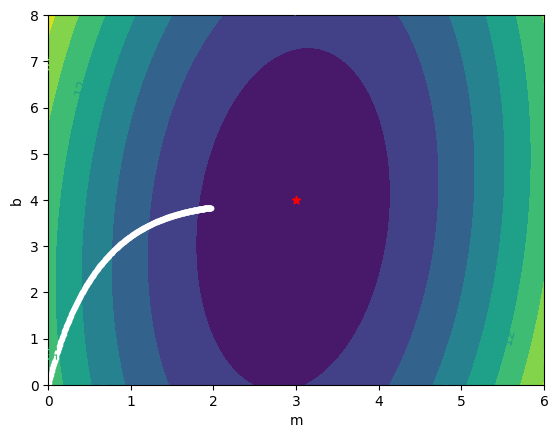

In [4]:
# Full Batch GD on dataset 2

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

m = 0
b = 0
a = 0.005    # learning rate
converged = False
epsilon = 0.001

m, b, epochs, cost, del_m, del_b = vanilla_gradient_descent(x1, y, m, b, a, converged, epsilon)
print("final slope = ", m[-1])
print("final intercept = ", b[-1])
print("epochs = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i]*x1 + b[i] # estimated function for underlying function

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1]*x1 + b[-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# contour plot
m1 = np.linspace(0,6,200)
b1 = np.linspace(0,8,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(3,4, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")


final slope =  2.54706980654928
final intercept =  3.9205433420792266
Average no of epochs =  135.85
No of epochs taken by last iteration =  168
cost =  [3.16980044 2.07085908 1.61610457 1.28870508 1.01533808 0.98425795
 0.86680303 0.87992704 0.68057435 0.70914055 0.84905674 0.76514733
 0.59595367 0.73659621 0.59067203 0.62325627 0.62733116 0.67131517
 0.56942985 0.60844573 0.6355685  0.7099397  0.6249207  0.67373423
 0.57115024 0.668298   0.68031947 0.52375524 0.57846196 0.63325681
 0.74434655 0.5014286  0.65767927 0.68249645 0.5930636  0.5463986
 0.70088168 0.61471811 0.65859104 0.56936752 0.56460854 0.62444159
 0.66367536 0.63760254 0.65299731 0.48785879 0.68536262 0.53901842
 0.63141241 0.58837621 0.68886402 0.60974529 0.61710453 0.73633937
 0.63048158 0.71682293 0.84308805 0.68393257 0.59148412 0.65078576
 0.63027224 0.66375532 0.66759956 0.76061042 0.62138816 0.76568087
 0.71434824 0.66029326 0.58819214 0.52072833 0.41140122 0.63437394
 0.6711395  0.59508762 0.61016737 0.56394956

Text(0, 0.5, 'b')

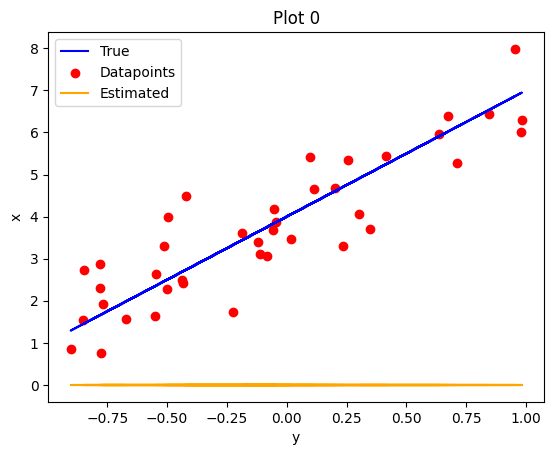

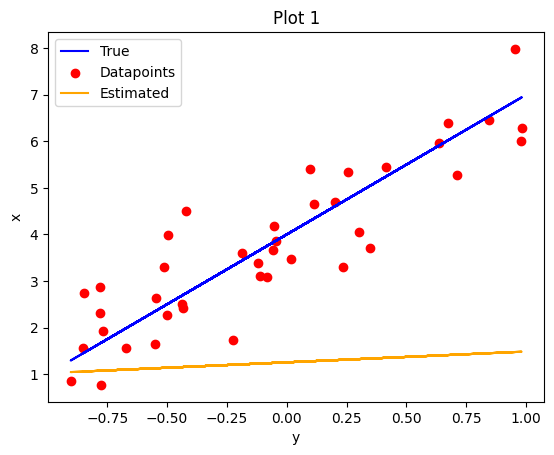

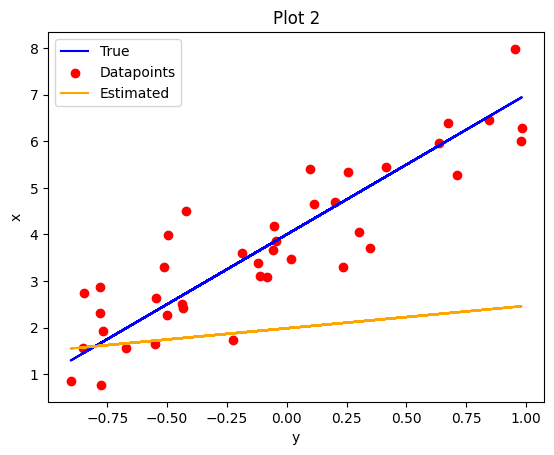

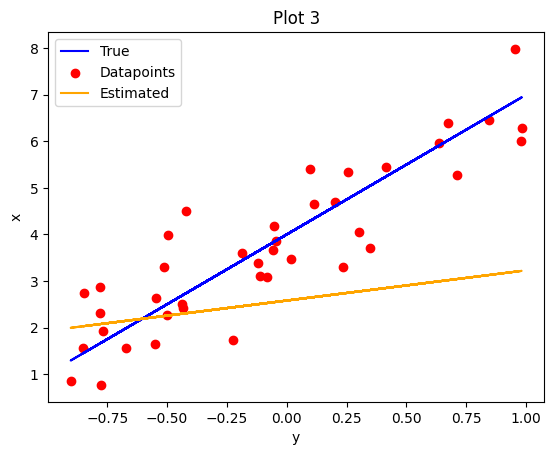

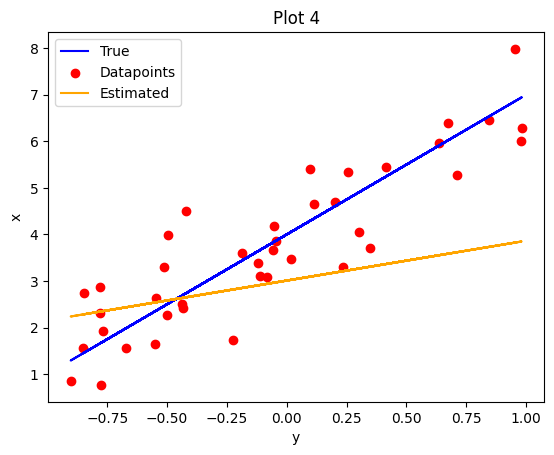

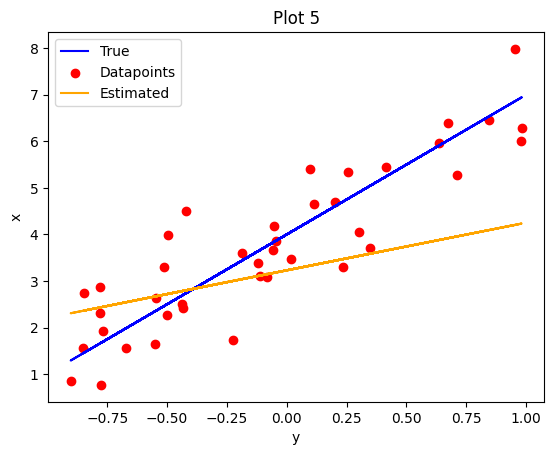

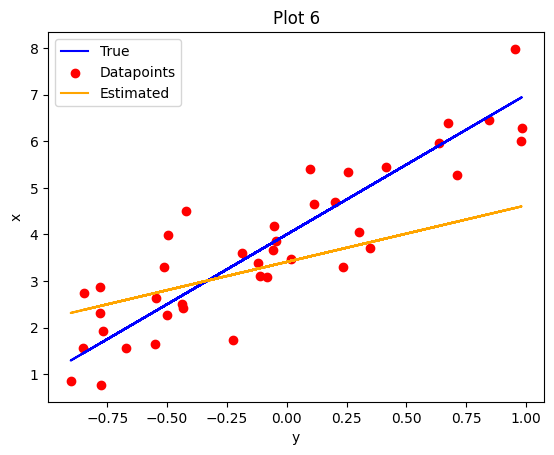

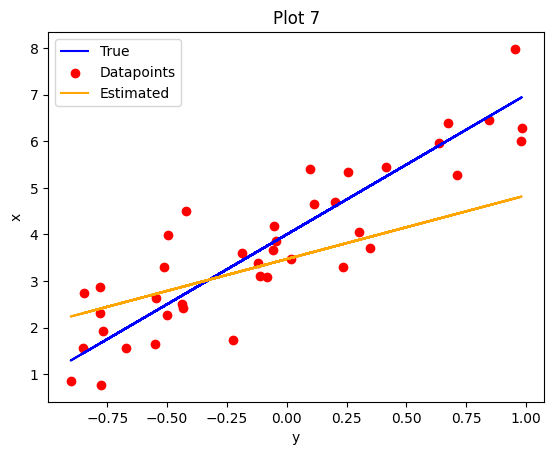

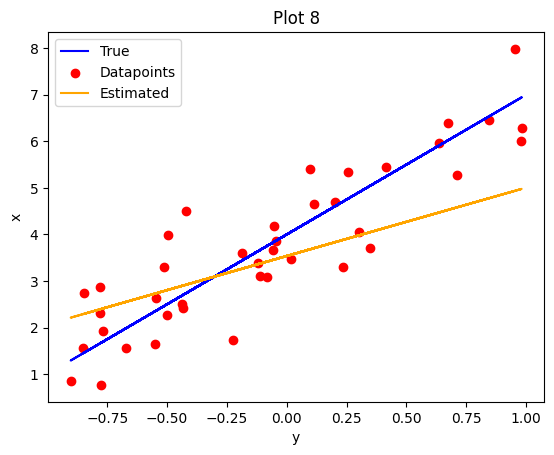

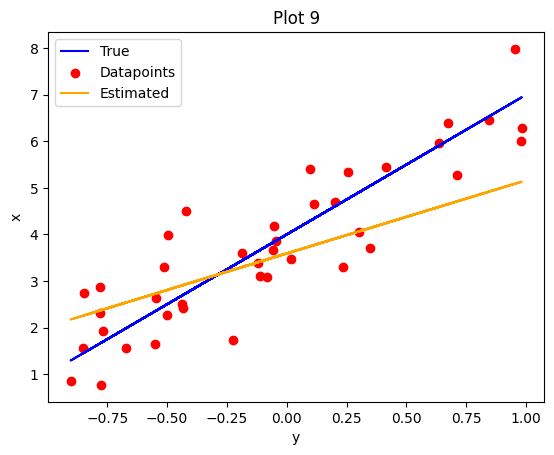

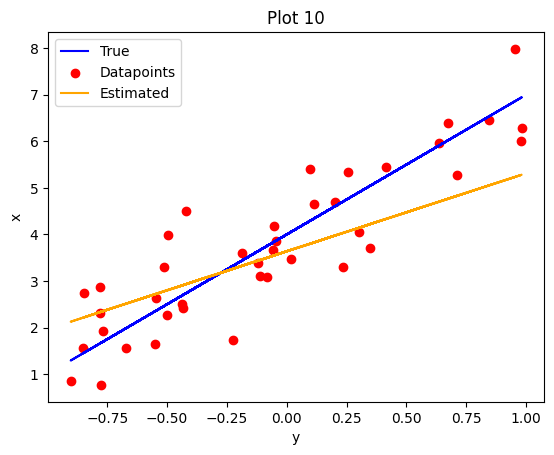

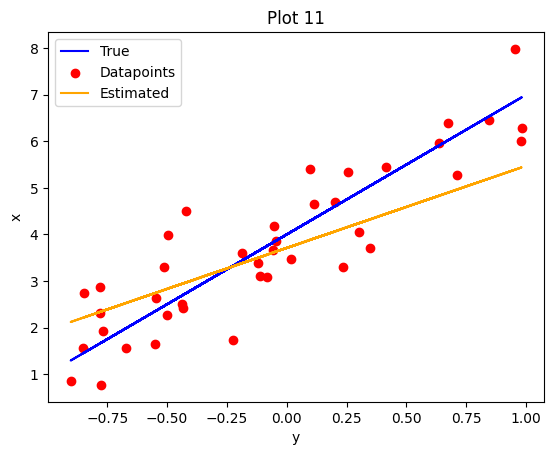

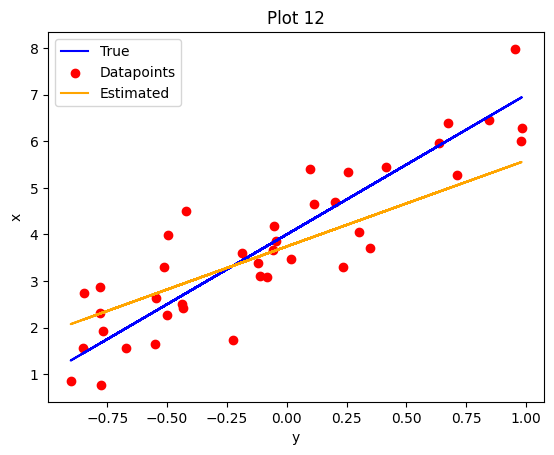

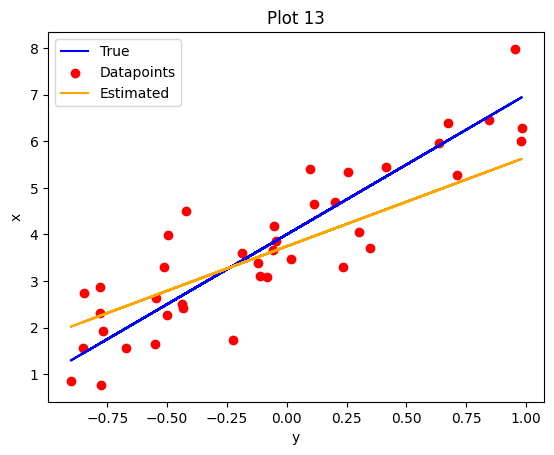

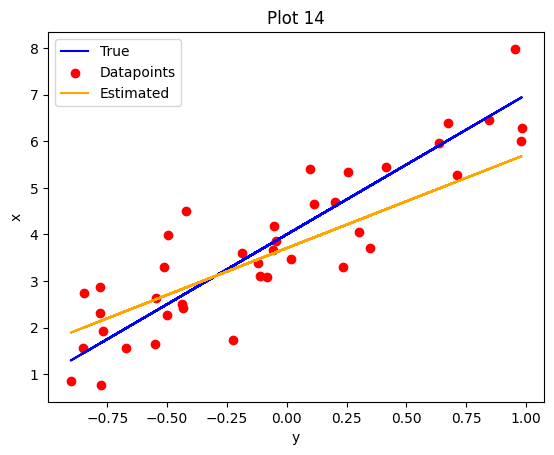

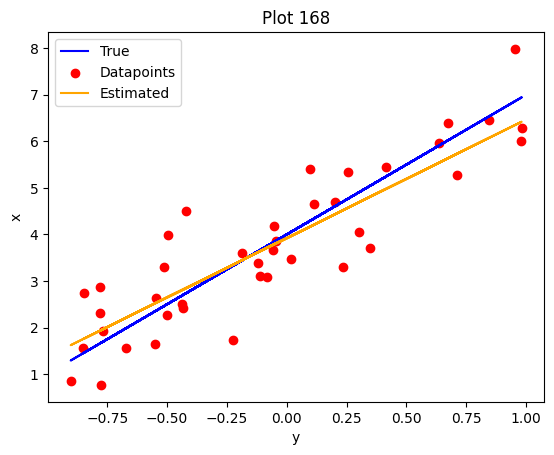

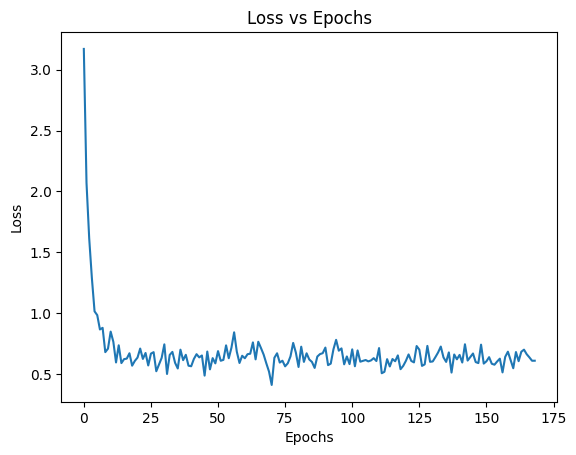

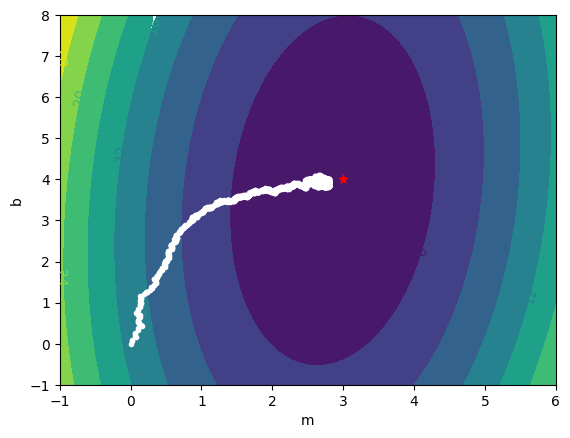

In [5]:
# SGD on dataset 2

np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

m = 0
b = 0
a = 0.005    # learning rate
converged = False
epsilon = 0.001

epochs_avg = []
for k in range(100):
    M, B, epochs, cost, del_m, del_b = stochastic_gradient_descent(x1, y, m, b, a, converged, epsilon)
    epochs_avg.append(epochs)
m = M
b = B

print("final slope = ", m[-1][-1])
print("final intercept = ", b[-1][-1])
print("Average no of epochs = ", sum(epochs_avg)/len(epochs_avg))
print("No of epochs taken by last iteration = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i][0]*x1 + b[i][0] # estimated function for underlying function, choosing m and b of the last iteration

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1][-1]*x1 + b[-1][-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# contour plot
m1 = np.linspace(-1,6,200)
b1 = np.linspace(-1,8,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(3,4, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")

Sgd is extemely sensitive to α in both accuracy of prediction and number of epochs. It reaches neigbhourhood of ϵ ery quickly but then bounces around a lot.

In [6]:
# VANILLA GRADIENT DESCENT W/ MOMENTUM

def vanilla_gradient_descent_with_momentum(x1, y, m, b, a, a2, converged, momentum, epsilon = 0.001, num_samples = 40):
    change_m = 0.0
    change_b = 0.0
    m = [m]     # theta_0
    b = [b]     # theta_1
    cost = []
    del_m = []
    del_b = []
    y_pred = m[0]*x1 + b[0]
    error = np.mean((y - y_pred)**2)
    cost.append(error)

    epochs = 0
    for i in range(1000):
        del_m.append((2 / num_samples) * np.sum(x1 * (y_pred - y)))
        del_b.append((2 / num_samples) * np.sum(y_pred - y))

        new_change_m = a*del_m[i] + momentum*change_m
        new_change_b = a2*del_b[i] + momentum*change_b
        m.append(m[i] - new_change_m)
        b.append(b[i] - new_change_b)
        change_m = new_change_m
        change_b = new_change_b

        y_pred = m[-1]*x1 + b[-1]
        error = np.mean((y - y_pred)**2)
        cost.append(error)
        epochs += 1

        if (np.abs(cost[i]-cost[i+1]) < epsilon):
            converged = True
            break
    return m, b, epochs, cost, del_m, del_b




# STOCHASTIC GRADIENT DESCENT

def stochastic_gradient_descent_with_momentum(x1, y, m, b, a, a2, converged, momentum, epsilon = 0.001, num_samples = 40):
    change_m = 0.0
    change_b = 0.0
    m = [[m]]     # theta_0
    b = [[b]]     # theta_1
    del_m = [[]]
    del_b = [[]]
    cost = [[]]

    epochs = 0
    for i in range(1000):
      for j in range(num_samples):

        random_index = np.random.randint(num_samples)
        xi = x1[random_index]
        yi = y[random_index]
        yi_pred = m[i][j] * xi + b[i][j]
        error = np.abs(yi - yi_pred)
        cost[i].append(error)

        del_m[i].append(2 * xi * (yi_pred - yi))
        del_b[i].append(2 * (yi_pred - yi))

        new_change_m = a*del_m[i][j] + momentum*change_m
        new_change_b = a2*del_b[i][j] + momentum*change_b
        m[i].append(m[i][j] - new_change_m)
        b[i].append(b[i][j] - new_change_b)
        change_m = new_change_m
        change_b = new_change_b

      if i != 0:
        if (np.abs(np.mean(cost[i])-np.mean(cost[i-1])) < epsilon):
            converged = True
            break

      m.append([m[i][j]])
      b.append([b[i][j]])
      cost.append([])
      del_m.append([])
      del_b.append([])
      epochs += 1

    cost = np.mean(cost, axis = 1).flatten()
    del_m = np.mean(del_m, axis = 1)
    del_b = np.mean(del_b, axis = 1)
    return m, b, epochs, cost, del_m, del_b

[90, 92.51273314620803, 96.40065573729275, 100.4062114681751, 103.49364003716501, 105.06637242397208, 105.02995528325302, 103.71549628902369, 101.71087303916434, 99.66080960043003, 98.09257173541596, 97.30620730569207, 97.34416120851223, 98.03206882078085, 99.06618291411681, 100.11601281338501, 100.9131943844434, 101.30688546504066, 101.27838211667338, 100.91941770877082, 100.386892514307, 99.85018843851654, 99.44586646294161, 99.24971911279272, 99.26976983606062, 99.45779910561392, 99.73277902335722, 100.0079123353991, 100.21372167951316, 100.31214390676939, 100.2998665471609, 100.20221479879406, 100.0610238145121, 99.92076413976524, 99.81677604817685, 99.76816441175411, 99.77621760581707, 99.82764521561714, 99.90085255149927, 99.97305891637083, 100.02629194756739, 100.05096792909431, 100.04663606420284, 100.0202658237473, 99.98300157616623, 99.94651121210023, 99.91993273966925, 99.90807091218815, 99.91104962975876, 99.92521680496228, 99.94482252231617, 99.96389172855845, 99.977779281

Text(0, 0.5, 'b')

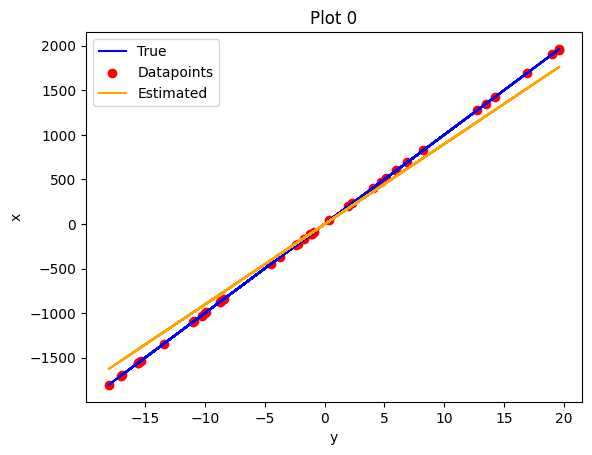

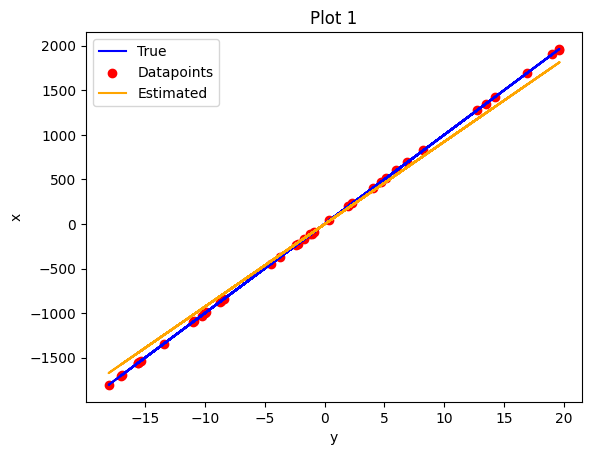

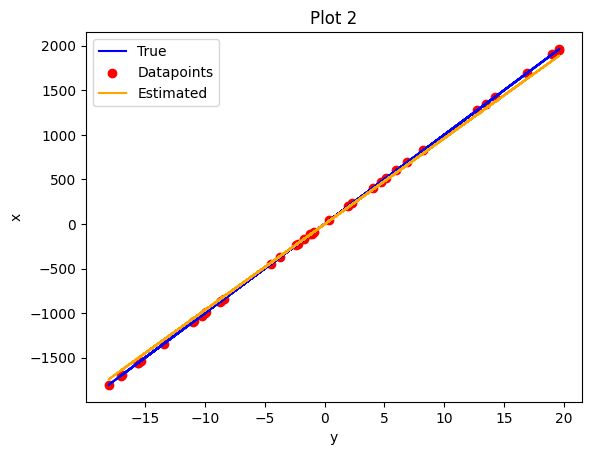

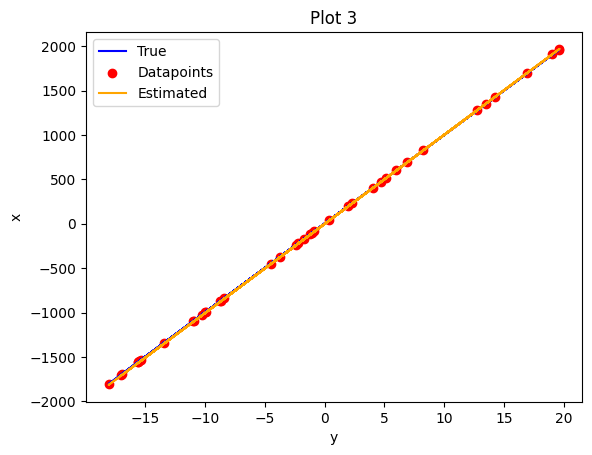

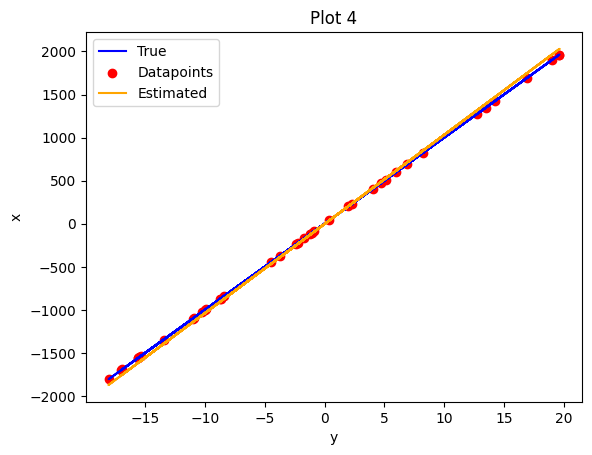

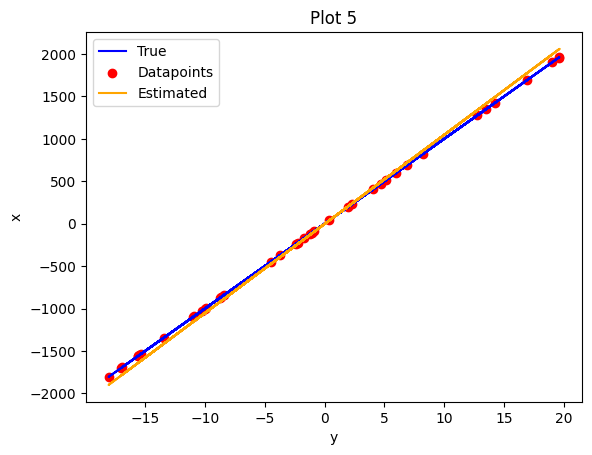

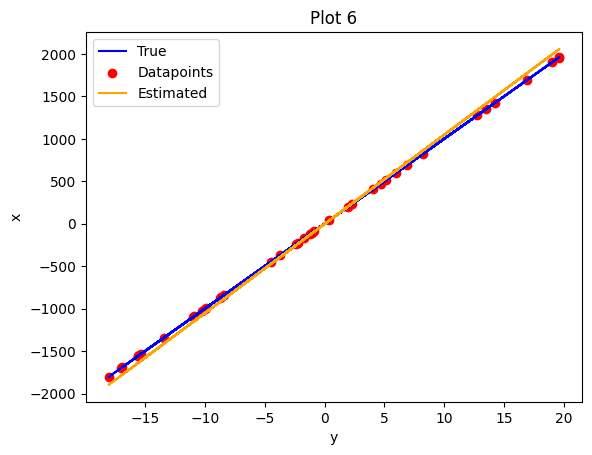

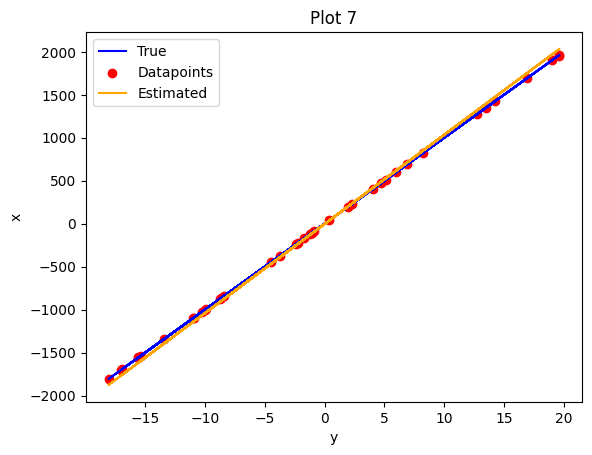

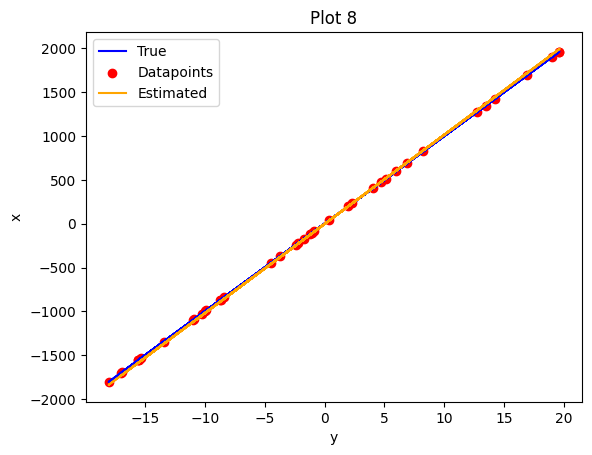

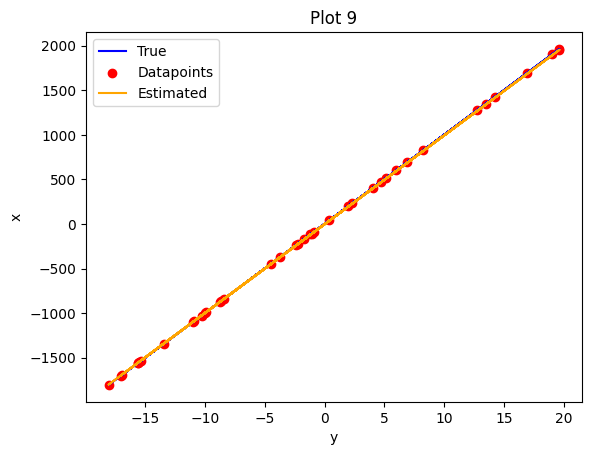

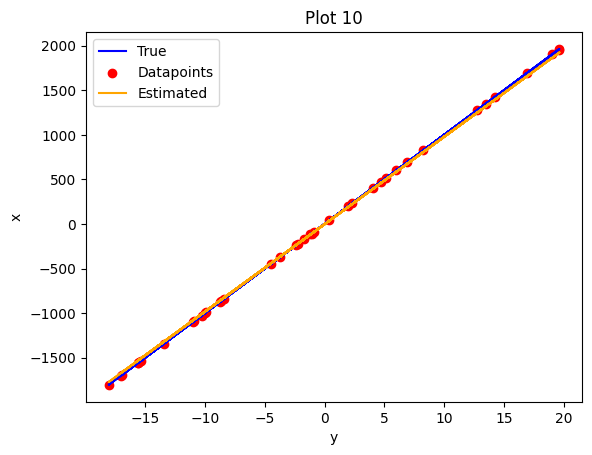

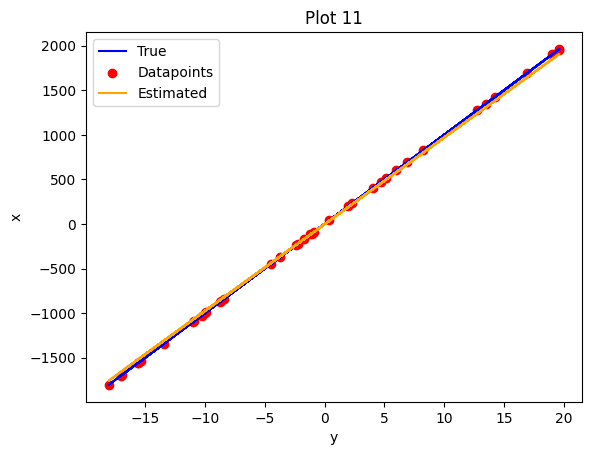

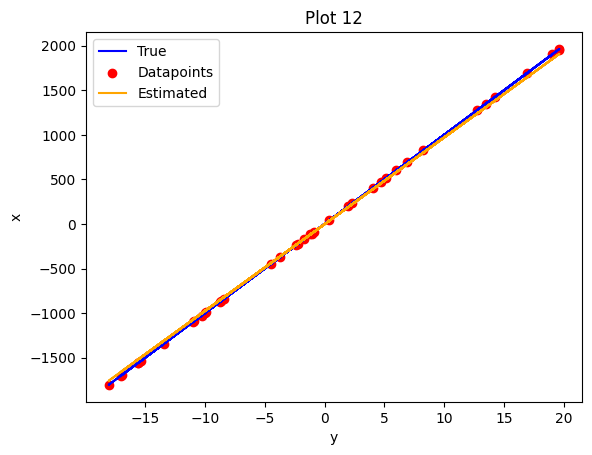

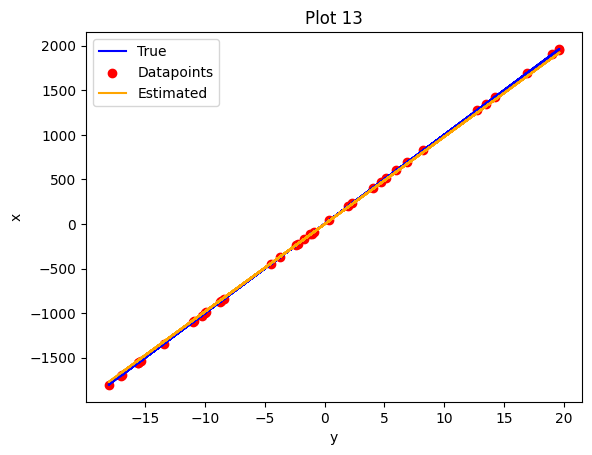

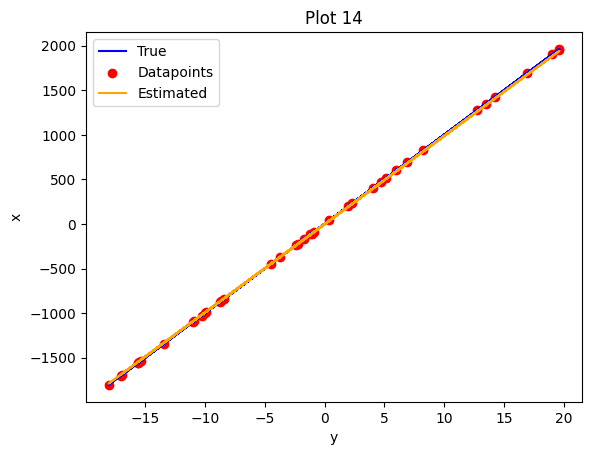

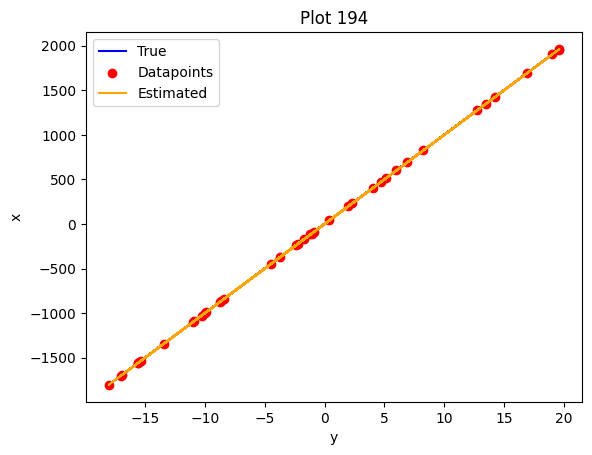

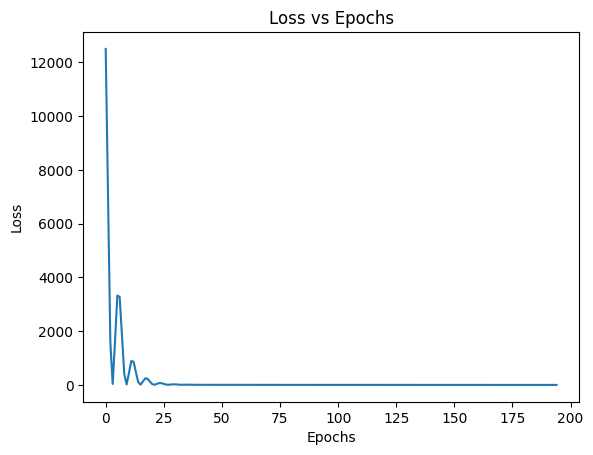

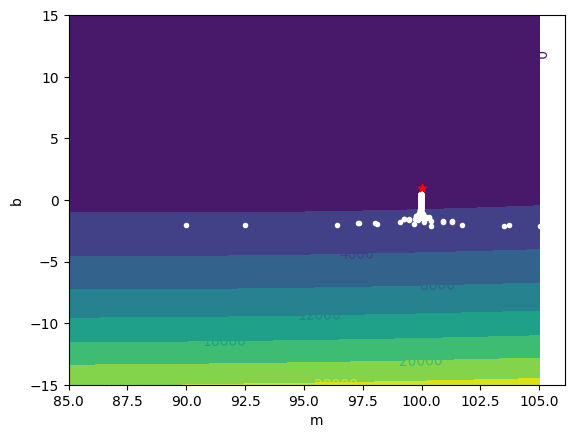

In [7]:
# FULL BATCH GD ON DATASET 1 WITH MOMENTUM

import numpy as np
import matplotlib.pyplot as plt

num_samples = 40
np.random.seed(45)

x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1

eps = np.random.randn(num_samples)
y = f_x + eps

m = 90
b = -2
a = 0.001  # learning rate
a2 = 0.001
converged = False
epsilon = 0.004
momentum = 0.8

m, b, epochs, cost, del_m, del_b = vanilla_gradient_descent_with_momentum(x1, y, m, b, a, a2, converged, momentum, epsilon)
print(m, b)
print("final slope = ", m[-1])
print("final intercept = ", b[-1])
print("epochs = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i]*x1 + b[i] # estimated function for underlying function

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1]*x1 + b[-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# contour plot
m1 = np.linspace(85,105,200)
b1 = np.linspace(-15,15,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(100,1, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")

final slope =  100.03773535080133
final intercept =  1.0033541889877766
epochs =  168
cost =  [12.59199482  2.40953206  2.39282597  1.87462635  2.05827008  1.69802803
  1.5033653   1.62239583  1.38179764  1.41668386  1.16181745  1.16072894
  1.04477481  1.0486428   1.11411824  0.98089299  0.94184283  1.03322685
  0.75856956  0.71432497  0.84573248  0.87066143  0.85248304  0.70618931
  0.73608227  0.63312337  0.79836488  0.70453301  0.9057854   0.70704829
  0.8010213   0.65007173  0.69714615  0.70268722  0.74839564  0.72567722
  0.59333409  0.54527885  0.72178277  0.75860463  0.80913157  0.5644439
  0.71200842  0.74384729  0.75297521  0.85756698  0.73428949  0.7211379
  0.70817442  0.56830848  0.83351993  0.69814131  0.63049796  0.70830056
  0.68150429  0.90357128  0.73900678  0.59322093  0.55614724  0.5741741
  0.67454583  0.74441263  0.86441876  0.6383469   0.54743379  0.67760192
  0.79291448  0.79713506  0.60161775  0.66913695  0.71502584  0.66354269
  0.79586025  0.69038253  0.71850

Text(0, 0.5, 'b')

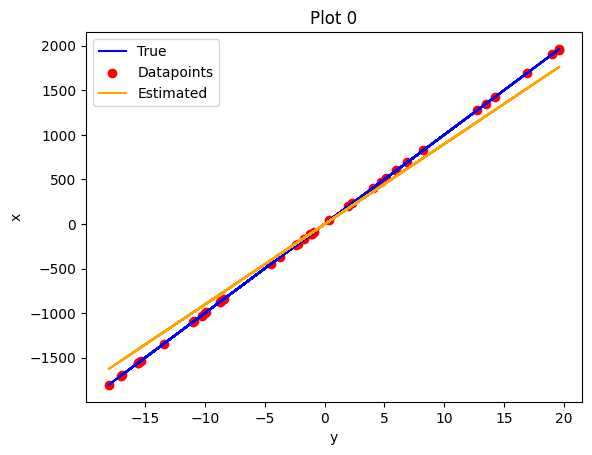

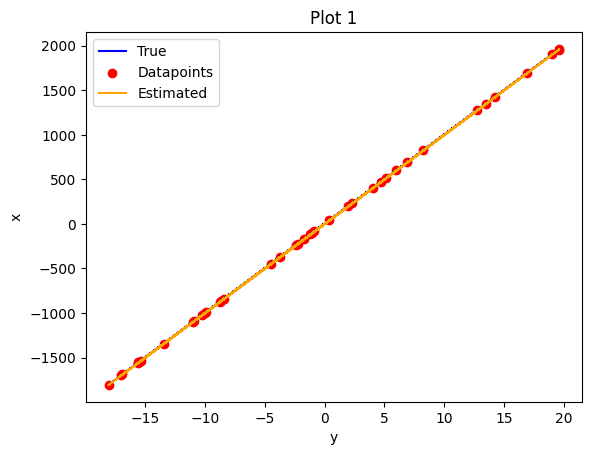

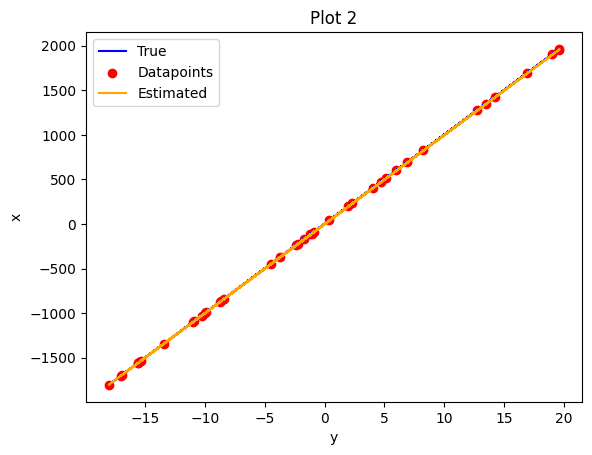

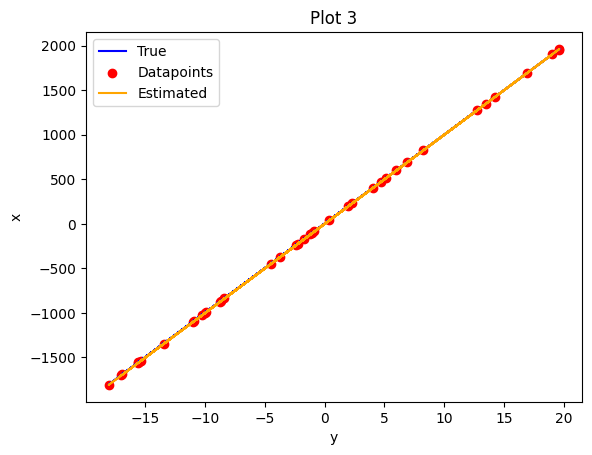

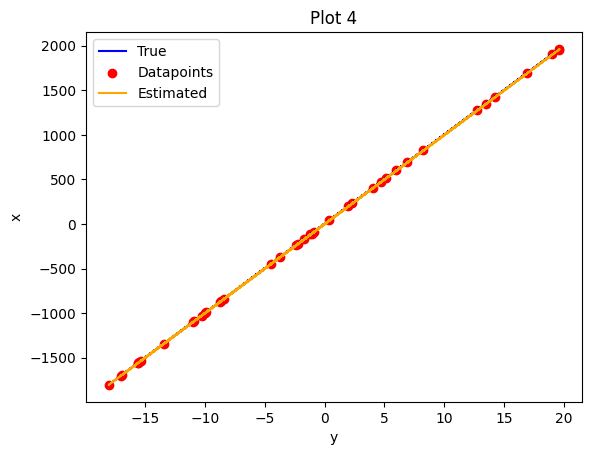

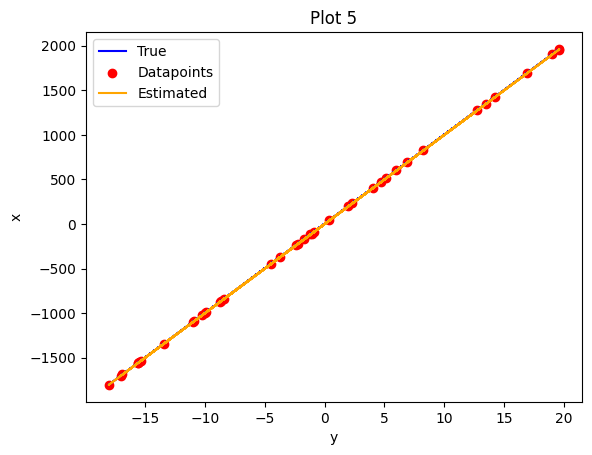

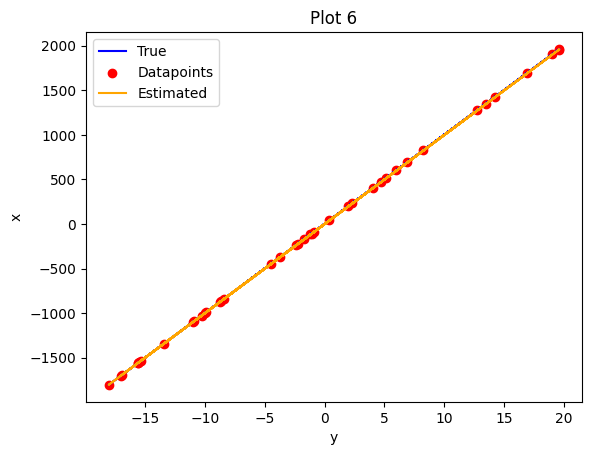

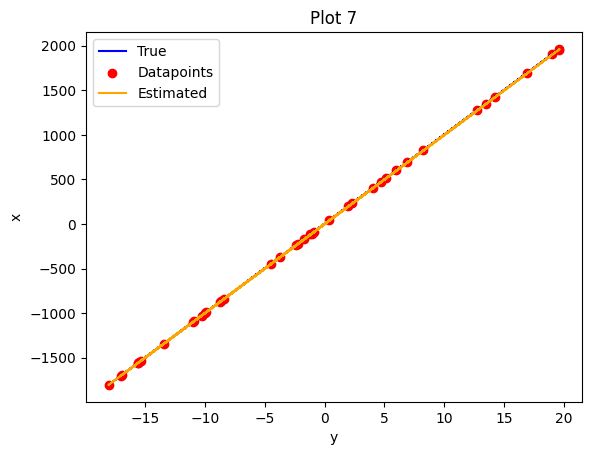

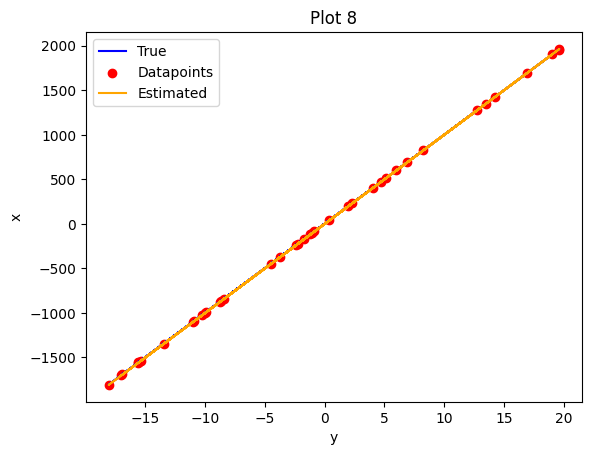

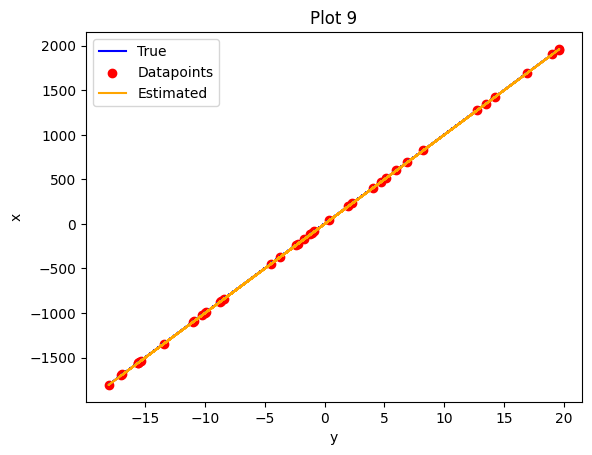

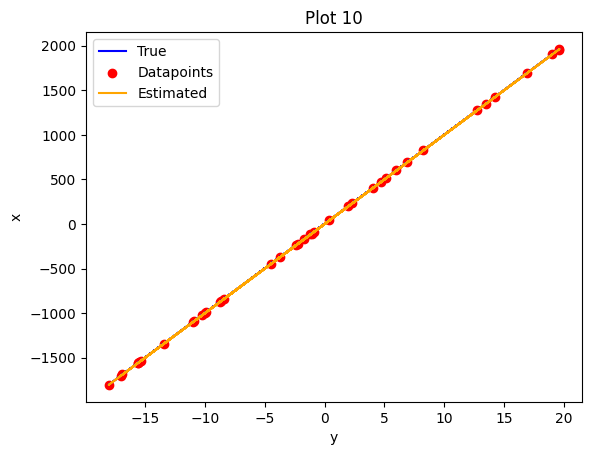

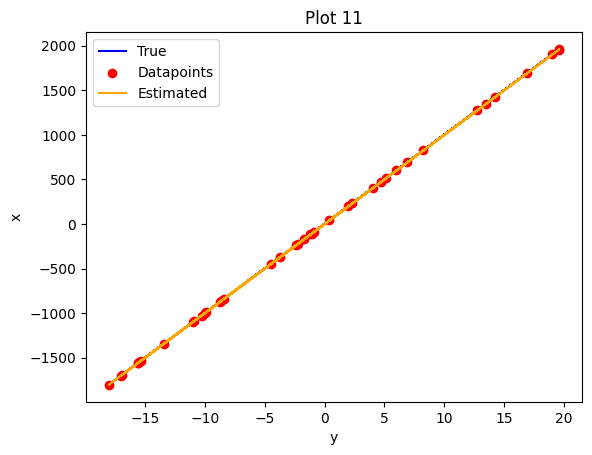

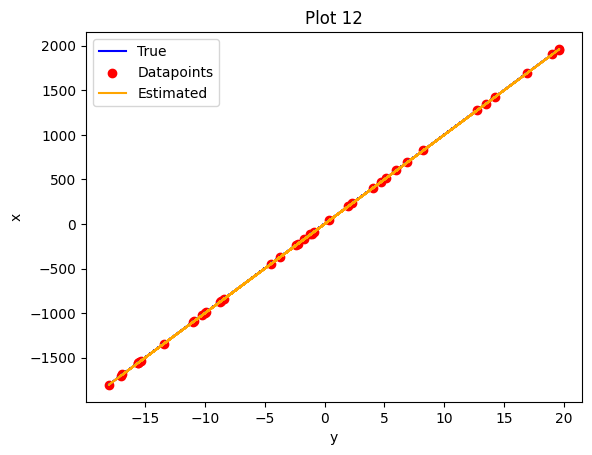

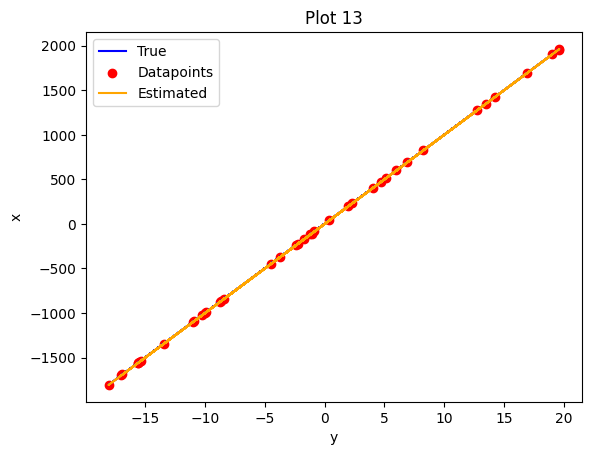

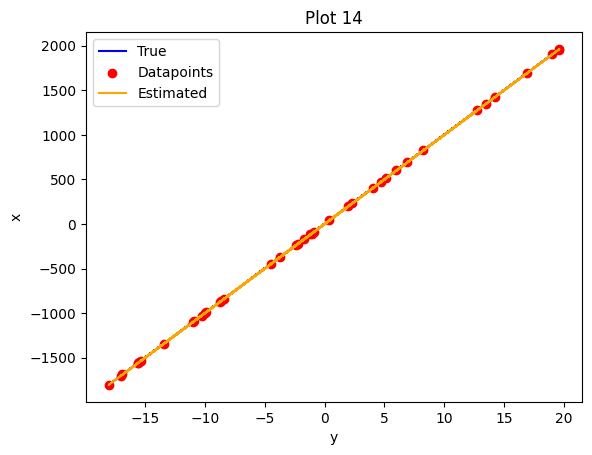

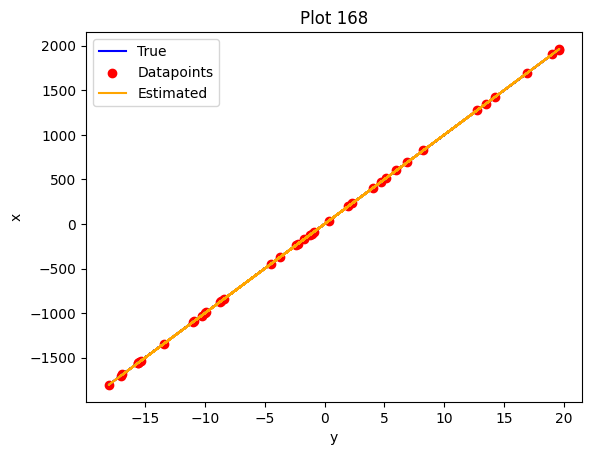

In [ ]:
# SGD on dataset 1 WITH MOMENTUM

import numpy as np
import matplotlib.pyplot as plt

num_samples = 40
np.random.seed(45)

x1 = np.random.uniform(-20, 20, num_samples)
f_x = 100*x1 + 1

eps = np.random.randn(num_samples)
y = f_x + eps

m = 90
b = -2
a = 0.001    # learning rate
a2 = 0.001

converged = False
epsilon = 0.001

m, b, epochs, cost, del_m, del_b = stochastic_gradient_descent_with_momentum(x1, y, m, b, a, a2, converged, epsilon)

print("final slope = ", m[-1][-1])
print("final intercept = ", b[-1][-1])
print("epochs = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i][0]*x1 + b[i][0] # estimated function for underlying function, choosing m and b at the end of each epoch

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1][-1]*x1 + b[-1][-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')


# contour plot
m1 = np.linspace(85,105,200)
b1 = np.linspace(-5,5,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(100,1, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")

In [ ]:
# Full Batch GD on dataset 2

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

m = 0
b = 0
a = 0.0075    # learning rate
a2 = 0.0075
converged = False
epsilon = 0.001

m, b, epochs, cost, del_m,del_b = vanilla_gradient_descent_with_momentum(x1, y, m, b, a, a2, converged, epsilon)
print("final slope = ", m[-1])
print("final intercept = ", b[-1])
print("epochs = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i]*x1 + b[i] # estimated function for underlying function

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1]*x1 + b[-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# contour plot
m1 = np.linspace(0,6,200)
b1 = np.linspace(0,8,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(3,4, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")

In [ ]:
# SGD on dataset 2

np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

m = 0
b = 0
a = 0.0075    # learning rate
a2 = 0.0075
converged = False
epsilon = 0.001

m, b, epochs, cost, del_n, del_b = stochastic_gradient_descent_with_momentum(x1, y, m, b, a, a2, converged, epsilon)
print("final slope = ", m[-1][-1])
print("final intercept = ", b[-1][-1])
print("epochs = ", epochs)
print('cost = ', cost)
print('gradient of m = ', del_m)
print('gradient of b = ', del_b)

for i in range(15):
    y_pred = m[i][0]*x1 + b[i][0] # estimated function for underlying function, choosing m and b at the end of each epoch

    plt.figure()
    plt.plot(x1, f_x, color = 'blue', label = 'True')
    plt.scatter(x1, y, color = 'red', label = 'Datapoints')
    plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
    plt.xlabel('y')
    plt.ylabel('x')
    plt.title(f'Plot {i}')
    plt.legend()

y_pred = m[-1][-1]*x1 + b[-1][-1]
plt.figure()
plt.plot(x1, f_x, color = 'blue', label = 'True')
plt.scatter(x1, y, color = 'red', label = 'Datapoints')
plt.plot(x1, y_pred, color = "orange", label = 'Estimated')
plt.xlabel('y')
plt.ylabel('x')
plt.title(f'Plot {epochs}')
plt.legend()

plt.figure()
plt.plot(np.arange(epochs+1), cost)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')


# contour plot
m1 = np.linspace(-1,6,200)
b1 = np.linspace(-1,8,200)
m2,b2 = np.meshgrid(m1,b1)

def func(m2,b2,y,x1):
    lst = []
    for i in range(len(m2)):
        lst.append([])
        for j in range(len(b2)):
            lst[i].append(np.mean((y - m2[i]*x1 - b2[j])**2))
    return lst

plt.figure()
CS = plt.contourf(m2, b2, func(m1,b1,y,x1))
plt.scatter(m,b, marker ='.', color = 'w')
plt.scatter(3,4, marker ='*', color = 'r')
plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel("m")
plt.ylabel("b")